In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

In [2]:
# Set random seed for reproducibility
np.random.seed(42)
figsize = (5,4)

# 2D plots of steering vectors

In [213]:
positive_points = [[2.32729154, 0.1349072], [2.41141014, 0.01580245], # x = 2, y = 0.5
                   [1.54138571, 0.04993981], [2.16998087, 0.23581312],
                   [1.83357477, 0.48076723], [2.25170268, 0.29300808],
                   [1.6696729, 0.3788495], [1.95297635, 0.4238103],

                   [1.03357477, 1.28076723], [1.25170268, 1.29300808],
                   [1.0696729, 1.0788495], [0.95297635, 0.7238103],
        
                   [-0.3810791, 0.61978653], [-0.10192581, 0.65207818], # x = 0.2, y = 0.6
                   [-0.28228343, 0.38900386], [0.22016205, 0.37634949], 
                   [0.08207199, 0.50931133], [0.10731001, 0.76456646],
                   [0.13318521, 0.43809939], [0.0365122, 0.42960148]]

negative_points = [[-2.29541563, -0.12498412], [-2.39572286, -0.27286461], # x =  -2, y = -0.5
                   [-2.1370127, -0.00383064], [-2.18911171, -0.3276638],
                   [-2.3034969, -0.57422783], [-1.42094783, -0.28826193],
                   [-2.21130172, -0.16283007], [-1.98607813, -0.00755663],

                   [-0.8034969, -1.57422783], [-1.42094783, -1.28826193],
                   [-1.21130172, -1.16283007], [-0.98607813, -1.00755663],
                   
                   [0.1068226, -0.57981249], [0.21068258, -0.67098728], # x = -0.2, y = -0.6
                   [0.1959816, -0.35150466], [-0.2835971, -0.68610482],
                   [-0.13023385, -0.70835348], [-0.01429909, -0.49512324],
                   [-0.2217339, -0.67428967], [-0.1323771, -0.42921454]]

positive_points = np.array(positive_points)
negative_points = np.array(negative_points)

In [215]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_steering_vector_without_normalization(positive_points, negative_points):
    """
    Calculate the steering vector without normalization.
    """
    return np.mean(positive_points - negative_points, axis=0)

def calculate_steering_vector_with_normalization(positive_points, negative_points):
    """
    Calculate the steering vector with normalization.
    """
    differences = positive_points - negative_points
    normalized_differences = differences / np.linalg.norm(differences, axis=1)[:, np.newaxis]
    return np.mean(normalized_differences, axis=0)

def normalize_vector(vector):
    """
    Normalize a vector to unit length.
    """
    return vector / np.linalg.norm(vector)

def shuffle_points(points):
    """
    Shuffle the points independently.
    """
    return np.random.permutation(points)

def plot_points_with_arrows_and_steering_vectors(positive_points, negative_points, ax, title):
    """
    Plot positive and negative points with connecting arrows, normalized steering vectors, and mean points.
    """
    ax.axhline(0, color='black', linewidth=1, zorder=1)  # X-axis
    ax.axvline(0, color='black', linewidth=1, zorder=1)  # Y-axis
    
    # Calculate steering vectors
    steering_vector_without_norm = calculate_steering_vector_without_normalization(positive_points, negative_points)
    steering_vector_with_norm = calculate_steering_vector_with_normalization(positive_points, negative_points)

    # Normalize the steering vectors
    steering_vector_without_norm = normalize_vector(steering_vector_without_norm)
    steering_vector_with_norm = normalize_vector(steering_vector_with_norm)

    # Calculate mean points
    positive_mean = np.mean(positive_points, axis=0)
    negative_mean = np.mean(negative_points, axis=0)

    # Plot larger positive points in red
    pos_points = ax.scatter(positive_points[:, 0], positive_points[:, 1], color='red', s=50, label='Positive Points', zorder=3)

    # Plot larger negative points in blue
    neg_points = ax.scatter(negative_points[:, 0], negative_points[:, 1], color='blue', s=50, label='Negative Points', zorder=3)

    # Plot mean points
    pos_mean = ax.scatter(positive_mean[0], positive_mean[1], color='red', s=100, marker='*', label='Positive Mean', zorder=5, edgecolors='black')
    neg_mean = ax.scatter(negative_mean[0], negative_mean[1], color='blue', s=100, marker='*', label='Negative Mean', zorder=5, edgecolors='black')

    # Draw arrows connecting each positive-negative pair
    for i in range(len(positive_points)):
        ax.arrow(negative_points[i, 0], negative_points[i, 1],
                 positive_points[i, 0] - negative_points[i, 0],
                 positive_points[i, 1] - negative_points[i, 1],
                 head_width=0.15, head_length=0.2, fc='grey', ec='grey', linewidth=0.5,
                 length_includes_head=True, alpha=0.8, zorder=2)

    # Plot normalized steering vector with initial normalization
    with_norm = ax.arrow(0, 0, steering_vector_with_norm[0], steering_vector_with_norm[1],
                         head_width=0.2, head_length=0.3, fc='darkgreen', ec='darkgreen', linewidth=2,
                         length_includes_head=True, label='With normalization', zorder=4)

    # Plot normalized steering vector without initial normalization
    without_norm = ax.arrow(0, 0, steering_vector_without_norm[0], steering_vector_without_norm[1],
                            head_width=0.2, head_length=0.3, fc='limegreen', ec='limegreen', linewidth=2,
                            length_includes_head=True, label='Without normalization', zorder=4)

    # Set limits
    ax.set_xlim(-2.6, 2.6)
    ax.set_ylim(-1.8, 1.5)

    # Labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(title)

    return [with_norm, without_norm, pos_points, neg_points, pos_mean, neg_mean]

def plot_original_and_shuffled(positive_points, negative_points):
    """
    Create two plots side by side: one with original data and one with shuffled data.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

    # Plot original data
    legend_handles = plot_points_with_arrows_and_steering_vectors(positive_points, negative_points, ax1, "Original Data")

    # Shuffle and plot shuffled data
    shuffled_positive = shuffle_points(positive_points)
    shuffled_negative = shuffle_points(negative_points)
    plot_points_with_arrows_and_steering_vectors(shuffled_positive, shuffled_negative, ax2, "Shuffled Data")

    # Add shared legend
    fig.legend(legend_handles, 
               ['With normalization', 'Without normalization', 'Positive Points', 'Negative Points', 'Positive Mean', 'Negative Mean'],
               loc='upper center', bbox_to_anchor=(0.5, 0.05), ncol=3)

    plt.tight_layout()
    plt.savefig('original_and_shuffled_plot.pdf', format='pdf', bbox_inches='tight')

    plt.show()


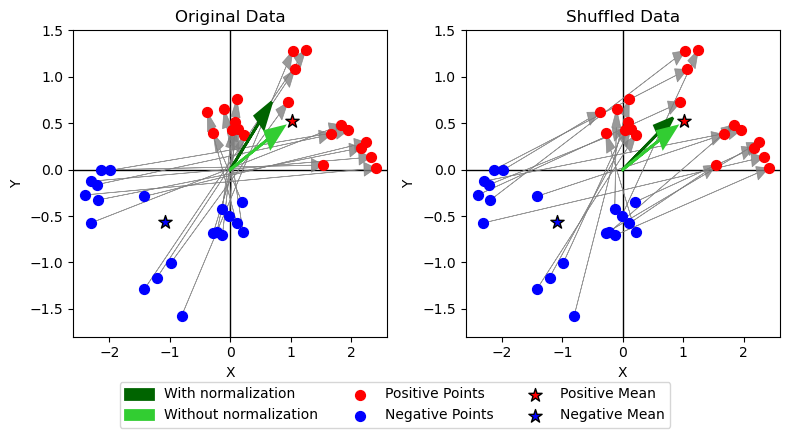

In [216]:
plot_original_and_shuffled(positive_points, negative_points)

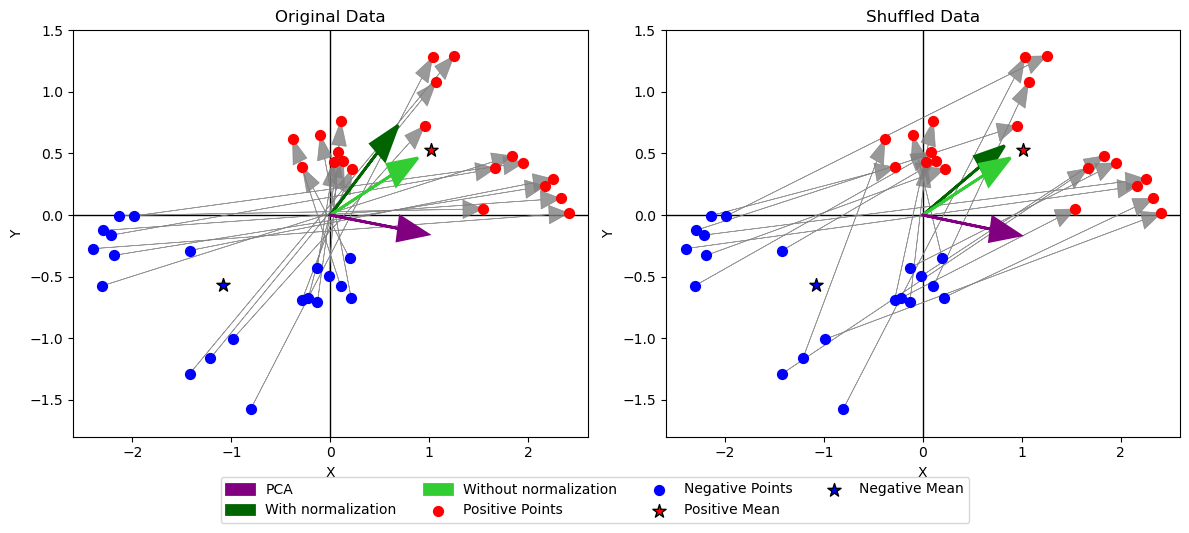

In [217]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

def calculate_steering_vector_without_normalization(positive_points, negative_points):
    """
    Calculate the steering vector without normalization.
    """
    return np.mean(positive_points - negative_points, axis=0)

def calculate_steering_vector_with_normalization(positive_points, negative_points):
    """
    Calculate the steering vector with normalization.
    """
    differences = positive_points - negative_points
    normalized_differences = differences / np.linalg.norm(differences, axis=1)[:, np.newaxis]
    return np.mean(normalized_differences, axis=0)

def calculate_steering_vector_with_pca(positive_points, negative_points):
    """
    Calculate the steering vector using PCA.
    """
    differences = positive_points - negative_points
    pca = PCA(n_components=1)
    pca.fit(differences)
    return pca.components_[0]

def normalize_vector(vector):
    """
    Normalize a vector to unit length.
    """
    return vector / np.linalg.norm(vector)

def shuffle_points(points):
    """
    Shuffle the points independently.
    """
    return np.random.permutation(points)

def plot_points_with_arrows_and_steering_vectors(positive_points, negative_points, ax, title):
    """
    Plot positive and negative points with connecting arrows, normalized steering vectors, and mean points.
    """
    ax.axhline(0, color='black', linewidth=1, zorder=1)  # X-axis
    ax.axvline(0, color='black', linewidth=1, zorder=1)  # Y-axis
    
    # Calculate steering vectors
    steering_vector_without_norm = calculate_steering_vector_without_normalization(positive_points, negative_points)
    steering_vector_with_norm = calculate_steering_vector_with_normalization(positive_points, negative_points)
    steering_vector_pca = calculate_steering_vector_with_pca(positive_points, negative_points)

    # Normalize the steering vectors
    steering_vector_without_norm = normalize_vector(steering_vector_without_norm)
    steering_vector_with_norm = normalize_vector(steering_vector_with_norm)
    steering_vector_pca = normalize_vector(steering_vector_pca)

    # Calculate mean points
    positive_mean = np.mean(positive_points, axis=0)
    negative_mean = np.mean(negative_points, axis=0)

    # Plot larger positive points in red
    pos_points = ax.scatter(positive_points[:, 0], positive_points[:, 1], color='red', s=50, label='Positive Points', zorder=3)

    # Plot larger negative points in blue
    neg_points = ax.scatter(negative_points[:, 0], negative_points[:, 1], color='blue', s=50, label='Negative Points', zorder=3)

    # Plot mean points
    pos_mean = ax.scatter(positive_mean[0], positive_mean[1], color='red', s=100, marker='*', label='Positive Mean', zorder=5, edgecolors='black')
    neg_mean = ax.scatter(negative_mean[0], negative_mean[1], color='blue', s=100, marker='*', label='Negative Mean', zorder=5, edgecolors='black')

    # Draw arrows connecting each positive-negative pair
    for i in range(len(positive_points)):
        ax.arrow(negative_points[i, 0], negative_points[i, 1],
                 positive_points[i, 0] - negative_points[i, 0],
                 positive_points[i, 1] - negative_points[i, 1],
                 head_width=0.15, head_length=0.2, fc='grey', ec='grey', linewidth=0.5,
                 length_includes_head=True, alpha=0.8, zorder=2)

    # Plot normalized steering vector with PCA (at the front)
    pca_norm = ax.arrow(0, 0, steering_vector_pca[0], steering_vector_pca[1],
                        head_width=0.2, head_length=0.3, fc='purple', ec='purple', linewidth=2,
                        length_includes_head=True, label='PCA', zorder=6)

    # Plot normalized steering vector with initial normalization
    with_norm = ax.arrow(0, 0, steering_vector_with_norm[0], steering_vector_with_norm[1],
                         head_width=0.2, head_length=0.3, fc='darkgreen', ec='darkgreen', linewidth=2,
                         length_includes_head=True, label='With normalization', zorder=4)

    # Plot normalized steering vector without initial normalization
    without_norm = ax.arrow(0, 0, steering_vector_without_norm[0], steering_vector_without_norm[1],
                            head_width=0.2, head_length=0.3, fc='limegreen', ec='limegreen', linewidth=2,
                            length_includes_head=True, label='Without normalization', zorder=4)

    # Set limits
    ax.set_xlim(-2.6, 2.6)
    ax.set_ylim(-1.8, 1.5)

    # Labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(title)

    return [pca_norm, with_norm, without_norm, pos_points, neg_points, pos_mean, neg_mean]

def plot_original_and_shuffled(positive_points, negative_points):
    """
    Create two plots side by side: one with original data and one with shuffled data.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Plot original data
    legend_handles = plot_points_with_arrows_and_steering_vectors(positive_points, negative_points, ax1, "Original Data")

    # Shuffle and plot shuffled data
    shuffled_positive = shuffle_points(positive_points)
    shuffled_negative = shuffle_points(negative_points)
    plot_points_with_arrows_and_steering_vectors(shuffled_positive, shuffled_negative, ax2, "Shuffled Data")

    # Add shared legend
    fig.legend(legend_handles, 
               ['PCA', 'With normalization', 'Without normalization', 'Positive Points', 'Negative Points', 'Positive Mean', 'Negative Mean'],
               loc='upper center', bbox_to_anchor=(0.5, 0.05), ncol=4)

    plt.tight_layout()
    plt.savefig('original_and_shuffled_plot_with_pca.pdf', format='pdf', bbox_inches='tight')

    plt.show()


plot_original_and_shuffled(positive_points, negative_points)

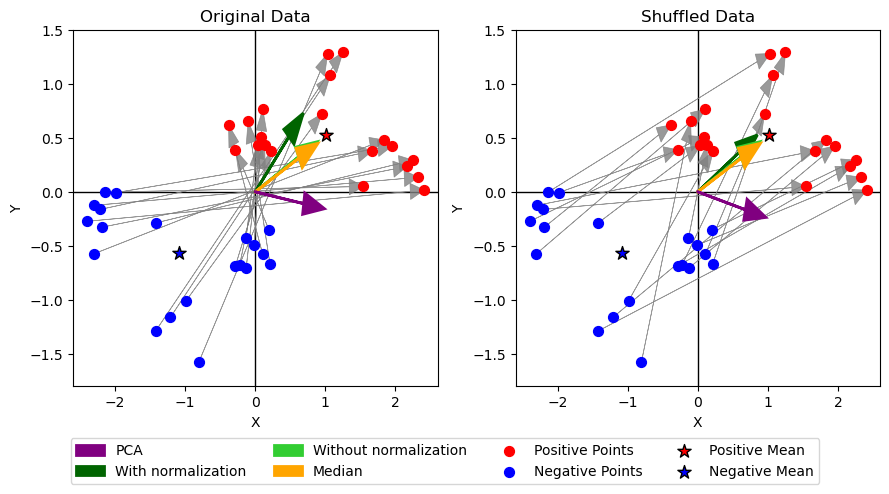

In [225]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

def calculate_steering_vector_without_normalization(positive_points, negative_points):
    """
    Calculate the steering vector without normalization.
    """
    return np.mean(positive_points - negative_points, axis=0)

def calculate_steering_vector_with_normalization(positive_points, negative_points):
    """
    Calculate the steering vector with normalization.
    """
    differences = positive_points - negative_points
    normalized_differences = differences / np.linalg.norm(differences, axis=1)[:, np.newaxis]
    return np.mean(normalized_differences, axis=0)

def calculate_steering_vector_with_pca(positive_points, negative_points):
    """
    Calculate the steering vector using PCA.
    """
    differences = positive_points - negative_points
    pca = PCA(n_components=1)
    pca.fit(differences)
    return pca.components_[0]

def calculate_steering_vector_with_median(positive_points, negative_points):
    """
    Calculate the steering vector using the median of differences.
    """
    differences = positive_points - negative_points
    return np.median(differences, axis=0)

def normalize_vector(vector):
    """
    Normalize a vector to unit length.
    """
    return vector / np.linalg.norm(vector)

def shuffle_points(points):
    """
    Shuffle the points independently.
    """
    return np.random.permutation(points)

def plot_points_with_arrows_and_steering_vectors(positive_points, negative_points, ax, title):
    """
    Plot positive and negative points with connecting arrows, normalized steering vectors, and mean points.
    """
    ax.axhline(0, color='black', linewidth=1, zorder=1)  # X-axis
    ax.axvline(0, color='black', linewidth=1, zorder=1)  # Y-axis
    
    # Calculate steering vectors
    steering_vector_without_norm = calculate_steering_vector_without_normalization(positive_points, negative_points)
    steering_vector_with_norm = calculate_steering_vector_with_normalization(positive_points, negative_points)
    steering_vector_pca = calculate_steering_vector_with_pca(positive_points, negative_points)
    steering_vector_median = calculate_steering_vector_with_median(positive_points, negative_points)

    # Normalize the steering vectors
    steering_vector_without_norm = normalize_vector(steering_vector_without_norm)
    steering_vector_with_norm = normalize_vector(steering_vector_with_norm)
    steering_vector_pca = normalize_vector(steering_vector_pca)
    steering_vector_median = normalize_vector(steering_vector_median)

    # Calculate mean points
    positive_mean = np.mean(positive_points, axis=0)
    negative_mean = np.mean(negative_points, axis=0)

    # Plot larger positive points in red
    pos_points = ax.scatter(positive_points[:, 0], positive_points[:, 1], color='red', s=50, label='Positive Points', zorder=3)

    # Plot larger negative points in blue
    neg_points = ax.scatter(negative_points[:, 0], negative_points[:, 1], color='blue', s=50, label='Negative Points', zorder=3)

    # Plot mean points
    pos_mean = ax.scatter(positive_mean[0], positive_mean[1], color='red', s=100, marker='*', label='Positive Mean', zorder=5, edgecolors='black')
    neg_mean = ax.scatter(negative_mean[0], negative_mean[1], color='blue', s=100, marker='*', label='Negative Mean', zorder=5, edgecolors='black')

    # Draw arrows connecting each positive-negative pair
    for i in range(len(positive_points)):
        ax.arrow(negative_points[i, 0], negative_points[i, 1],
                 positive_points[i, 0] - negative_points[i, 0],
                 positive_points[i, 1] - negative_points[i, 1],
                 head_width=0.15, head_length=0.2, fc='grey', ec='grey', linewidth=0.5,
                 length_includes_head=True, alpha=0.8, zorder=2)

    # Plot normalized steering vector with PCA
    pca_norm = ax.arrow(0, 0, steering_vector_pca[0], steering_vector_pca[1],
                        head_width=0.2, head_length=0.3, fc='purple', ec='purple', linewidth=2,
                        length_includes_head=True, label='PCA', zorder=6)

    # Plot normalized steering vector with initial normalization
    with_norm = ax.arrow(0, 0, steering_vector_with_norm[0], steering_vector_with_norm[1],
                         head_width=0.2, head_length=0.3, fc='darkgreen', ec='darkgreen', linewidth=2,
                         length_includes_head=True, label='With normalization', zorder=4)

    # Plot normalized steering vector without initial normalization
    without_norm = ax.arrow(0, 0, steering_vector_without_norm[0], steering_vector_without_norm[1],
                            head_width=0.2, head_length=0.3, fc='limegreen', ec='limegreen', linewidth=2,
                            length_includes_head=True, label='Without normalization', zorder=4)

    # Plot normalized steering vector with median
    median_norm = ax.arrow(0, 0, steering_vector_median[0], steering_vector_median[1],
                           head_width=0.2, head_length=0.3, fc='orange', ec='orange', linewidth=2,
                           length_includes_head=True, label='Median', zorder=5)

    # Set limits
    ax.set_xlim(-2.6, 2.6)
    ax.set_ylim(-1.8, 1.5)

    # Labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(title)

    return [pca_norm, with_norm, without_norm, median_norm, pos_points, neg_points, pos_mean, neg_mean]

def plot_original_and_shuffled(positive_points, negative_points):
    """
    Create two plots side by side: one with original data and one with shuffled data.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4.5))

    # Plot original data
    legend_handles = plot_points_with_arrows_and_steering_vectors(positive_points, negative_points, ax1, "Original Data")

    # Shuffle and plot shuffled data
    shuffled_positive = shuffle_points(positive_points)
    shuffled_negative = shuffle_points(negative_points)
    plot_points_with_arrows_and_steering_vectors(shuffled_positive, shuffled_negative, ax2, "Shuffled Data")

    # Add shared legend
    fig.legend(legend_handles, 
               ['PCA', 'With normalization', 'Without normalization', 'Median', 'Positive Points', 'Negative Points', 'Positive Mean', 'Negative Mean'],
               loc='upper center', bbox_to_anchor=(0.5, 0.03), ncol=4)

    plt.tight_layout()
    plt.savefig('original_and_shuffled_plot_with_median.pdf', format='pdf', bbox_inches='tight')

    plt.show()


plot_original_and_shuffled(positive_points, negative_points)

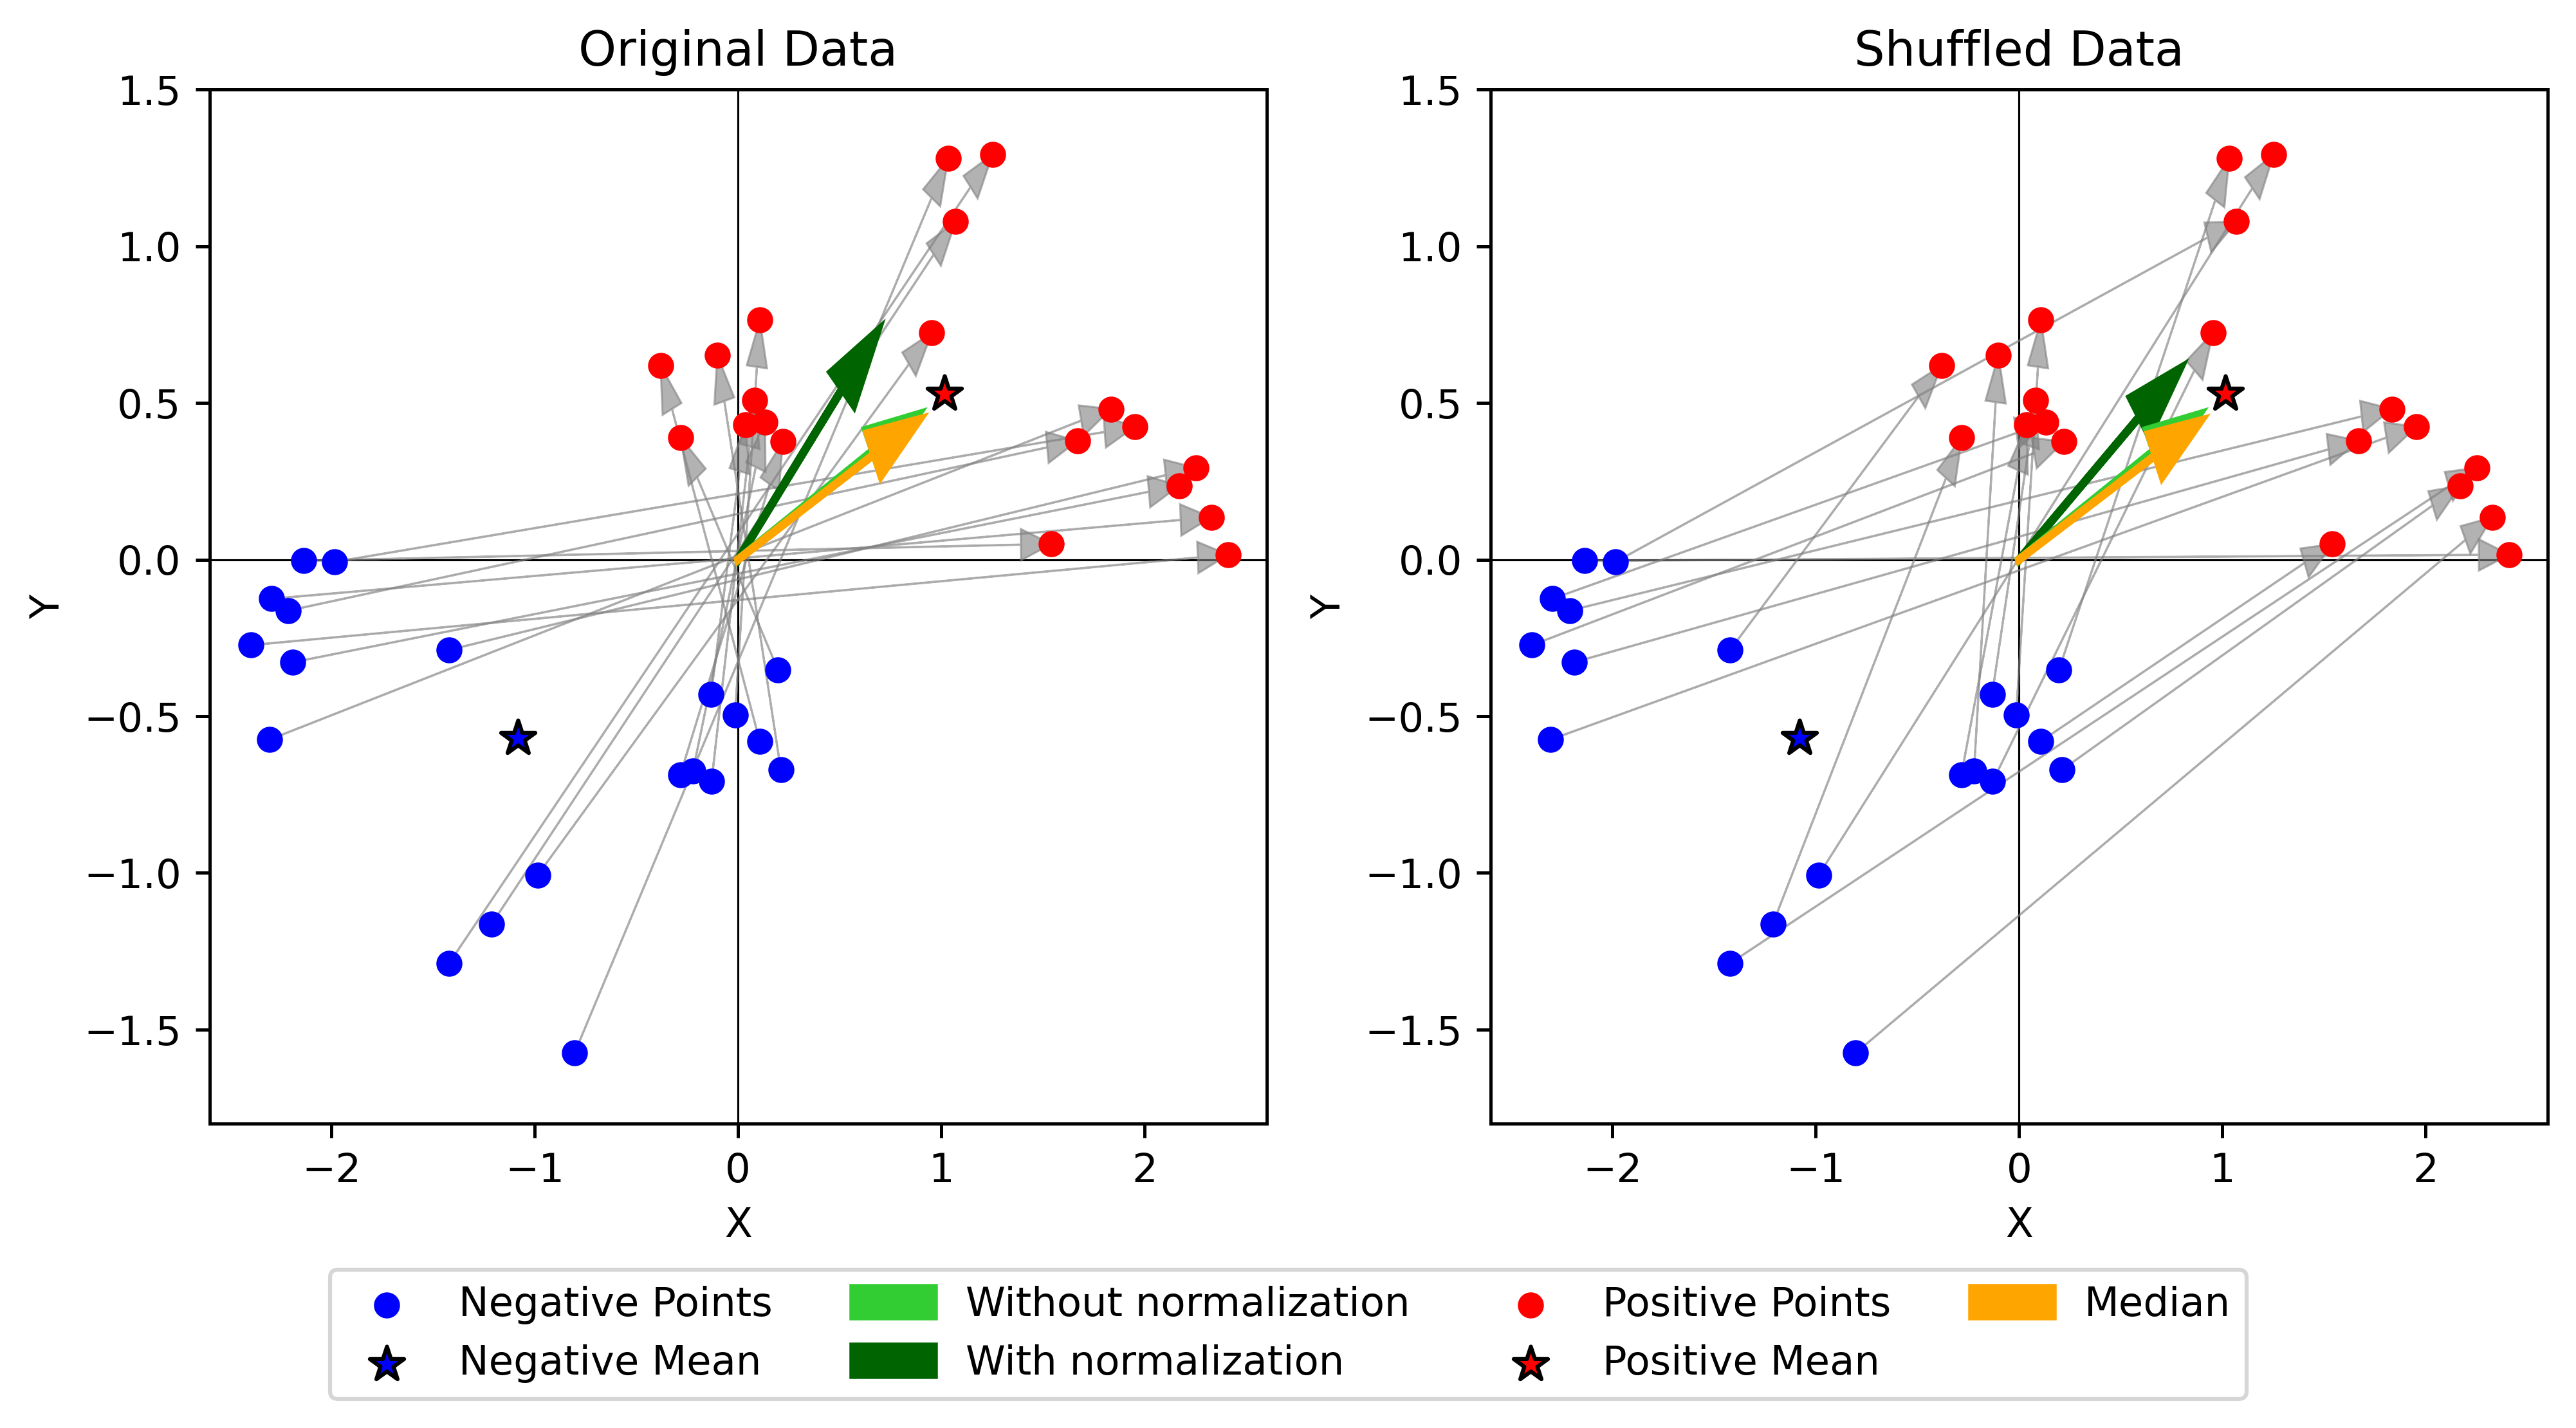

In [241]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_steering_vector_without_normalization(positive_points, negative_points):
    """
    Calculate the steering vector without normalization.
    """
    return np.mean(positive_points - negative_points, axis=0)

def calculate_steering_vector_with_normalization(positive_points, negative_points):
    """
    Calculate the steering vector with normalization.
    """
    differences = positive_points - negative_points
    normalized_differences = differences / np.linalg.norm(differences, axis=1)[:, np.newaxis]
    return np.mean(normalized_differences, axis=0)

def calculate_steering_vector_with_median(positive_points, negative_points):
    """
    Calculate the steering vector using the median of differences.
    """
    differences = positive_points - negative_points
    return np.median(differences, axis=0)

def normalize_vector(vector):
    """
    Normalize a vector to unit length.
    """
    return vector / np.linalg.norm(vector)

def shuffle_points(points):
    """
    Shuffle the points independently.
    """
    return np.random.permutation(points)

def plot_points_with_arrows_and_steering_vectors(positive_points, negative_points, ax, title):
    """
    Plot positive and negative points with connecting arrows, normalized steering vectors, and mean points.
    """
    ax.axhline(0, color='black', linewidth=0.5, zorder=1)  # X-axis
    ax.axvline(0, color='black', linewidth=0.5, zorder=1)  # Y-axis
    
    # Calculate steering vectors
    steering_vector_without_norm = calculate_steering_vector_without_normalization(positive_points, negative_points)
    steering_vector_with_norm = calculate_steering_vector_with_normalization(positive_points, negative_points)
    steering_vector_median = calculate_steering_vector_with_median(positive_points, negative_points)

    # Normalize the steering vectors
    steering_vector_without_norm = normalize_vector(steering_vector_without_norm)
    steering_vector_with_norm = normalize_vector(steering_vector_with_norm)
    steering_vector_median = normalize_vector(steering_vector_median)

    # Calculate mean points
    positive_mean = np.mean(positive_points, axis=0)
    negative_mean = np.mean(negative_points, axis=0)

    # Plot larger positive points in red
    pos_points = ax.scatter(positive_points[:, 0], positive_points[:, 1], color='red', s=30, label='Positive Points', zorder=3)

    # Plot larger negative points in blue
    neg_points = ax.scatter(negative_points[:, 0], negative_points[:, 1], color='blue', s=30, label='Negative Points', zorder=3)

    # Plot mean points
    pos_mean = ax.scatter(positive_mean[0], positive_mean[1], color='red', s=80, marker='*', label='Positive Mean', zorder=5, edgecolors='black')
    neg_mean = ax.scatter(negative_mean[0], negative_mean[1], color='blue', s=80, marker='*', label='Negative Mean', zorder=5, edgecolors='black')

    # Draw arrows connecting each positive-negative pair
    for i in range(len(positive_points)):
        ax.arrow(negative_points[i, 0], negative_points[i, 1],
                 positive_points[i, 0] - negative_points[i, 0],
                 positive_points[i, 1] - negative_points[i, 1],
                 head_width=0.1, head_length=0.15, fc='grey', ec='grey', linewidth=0.5,
                 length_includes_head=True, alpha=0.6, zorder=2)

    # Plot normalized steering vector with initial normalization
    with_norm = ax.arrow(0, 0, steering_vector_with_norm[0], steering_vector_with_norm[1],
                         head_width=0.15, head_length=0.25, fc='darkgreen', ec='darkgreen', linewidth=2,
                         length_includes_head=True, label='With normalization', zorder=4)

    # Plot normalized steering vector without initial normalization
    without_norm = ax.arrow(0, 0, steering_vector_without_norm[0], steering_vector_without_norm[1],
                            head_width=0.15, head_length=0.25, fc='limegreen', ec='limegreen', linewidth=2,
                            length_includes_head=True, label='Without normalization', zorder=4)

    # Plot normalized steering vector with median
    median_norm = ax.arrow(0, 0, steering_vector_median[0], steering_vector_median[1],
                           head_width=0.15, head_length=0.25, fc='orange', ec='orange', linewidth=2,
                           length_includes_head=True, label='Median', zorder=5)

    # Set limits
    ax.set_xlim(-2.6, 2.6)
    ax.set_ylim(-1.8, 1.5)

    # Labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(title)

    return [with_norm, without_norm, median_norm, pos_points, neg_points, pos_mean, neg_mean]

def plot_original_and_shuffled(positive_points, negative_points):
    """
    Create two plots side by side: one with original data and one with shuffled data.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4.5), dpi=450)

    # Plot original data
    legend_handles = plot_points_with_arrows_and_steering_vectors(positive_points, negative_points, ax1, "Original Data")

    # Shuffle and plot shuffled data
    shuffled_positive = shuffle_points(positive_points)
    shuffled_negative = shuffle_points(negative_points)
    plot_points_with_arrows_and_steering_vectors(shuffled_positive, shuffled_negative, ax2, "Shuffled Data")

    # Reorder legend handles and labels as specified
    # Original order: [with_norm, without_norm, median_norm, pos_points, neg_points, pos_mean, neg_mean]
    # New order: [neg_points, neg_mean, without_norm, with_norm, pos_points, pos_mean, median_norm]
    legend_handles_reordered = [legend_handles[4], legend_handles[6], legend_handles[1], legend_handles[0], legend_handles[3], legend_handles[5], legend_handles[2]]
    legend_labels_reordered = ['Negative Points', 'Negative Mean', 'Without normalization', 'With normalization', 'Positive Points', 'Positive Mean', 'Median']

    # Add shared legend with reordered items
    fig.legend(legend_handles_reordered, 
               legend_labels_reordered,
               loc='upper center', bbox_to_anchor=(0.5, 0.03), ncol=4, fontsize='medium')

    plt.tight_layout()
    plt.savefig('original_and_shuffled_plot_with_median.pdf', format='pdf', dpi=450, bbox_inches='tight')

    plt.show()

plot_original_and_shuffled(positive_points, negative_points)

Steering vector using Method 1 (Median of Differences): [ 3.00264984 -2.04741974]
Steering vector using Method 2 (Difference of Medians): [ 3.09795958 -2.20847274]


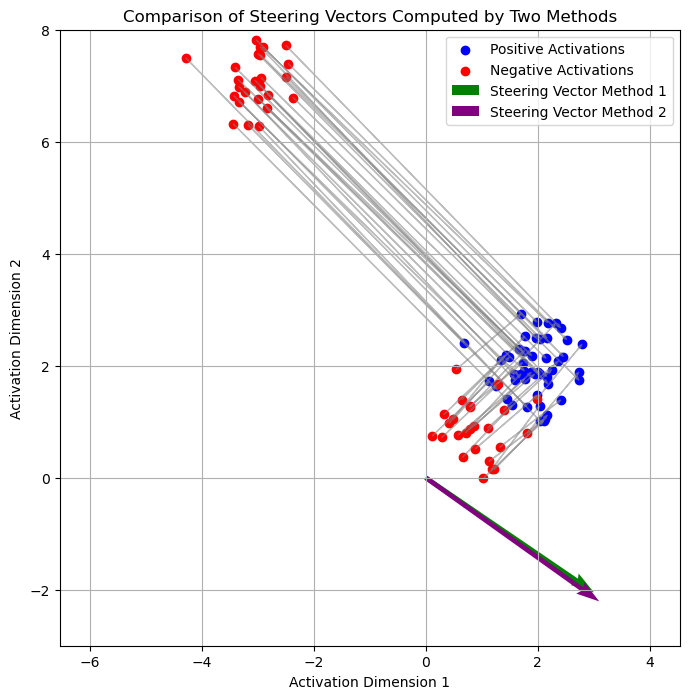

In [254]:
# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
N = 50

# Dimensionality of activations
d = 2

# Generate positive activations (clustered around (2, 2))
A_positive = np.random.randn(N, d) * 0.5 + np.array([2, 2])

# Generate negative activations
# For half of the samples, negative activations are close to positive activations
# For the other half, introduce significant differences to create skewness
A_negative = np.zeros((N, d))

for i in range(N):
    if i < N // 2:
        # Negative activations close to positive activations (paired)
        A_negative[i] = A_positive[i] - np.array([1, 1]) + np.random.randn(1, d) * 0.1
    else:
        # Negative activations far from positive activations (outliers)
        A_negative[i] = A_positive[i] - np.array([5, -5]) + np.random.randn(1, d) * 0.1

# Compute differences
Delta = A_positive - A_negative

# Method 1: Dimension-wise median of difference vectors
s_method1 = np.median(Delta, axis=0)

# Method 2: Difference of medians
median_positive = np.median(A_positive, axis=0)
median_negative = np.median(A_negative, axis=0)
s_method2 = median_positive - median_negative

# Print steering vectors
print("Steering vector using Method 1 (Median of Differences):", s_method1)
print("Steering vector using Method 2 (Difference of Medians):", s_method2)

# Plotting
plt.figure(figsize=(8, 8))

# Plot positive activations
plt.scatter(A_positive[:, 0], A_positive[:, 1], color='blue', label='Positive Activations')

# Plot negative activations
plt.scatter(A_negative[:, 0], A_negative[:, 1], color='red', label='Negative Activations')

# Plot differences as arrows
for i in range(N):
    plt.arrow(A_negative[i, 0], A_negative[i, 1],
              Delta[i, 0], Delta[i, 1],
              color='gray', alpha=0.5, head_width=0.05, length_includes_head=True)

# Plot steering vectors
origin = np.array([[0, 0]])  # Origin point

# Method 1 vector
plt.quiver(*origin.T, s_method1[0], s_method1[1], color='green', scale=1, scale_units='xy', angles='xy', label='Steering Vector Method 1')

# Method 2 vector
plt.quiver(*origin.T, s_method2[0], s_method2[1], color='purple', scale=1, scale_units='xy', angles='xy', label='Steering Vector Method 2')

plt.legend()
plt.title('Comparison of Steering Vectors Computed by Two Methods')
plt.xlabel('Activation Dimension 1')
plt.ylabel('Activation Dimension 2')
plt.grid(True)
plt.axis('equal')
plt.xlim(-5, 3)
plt.ylim(-3, 8)
plt.show()

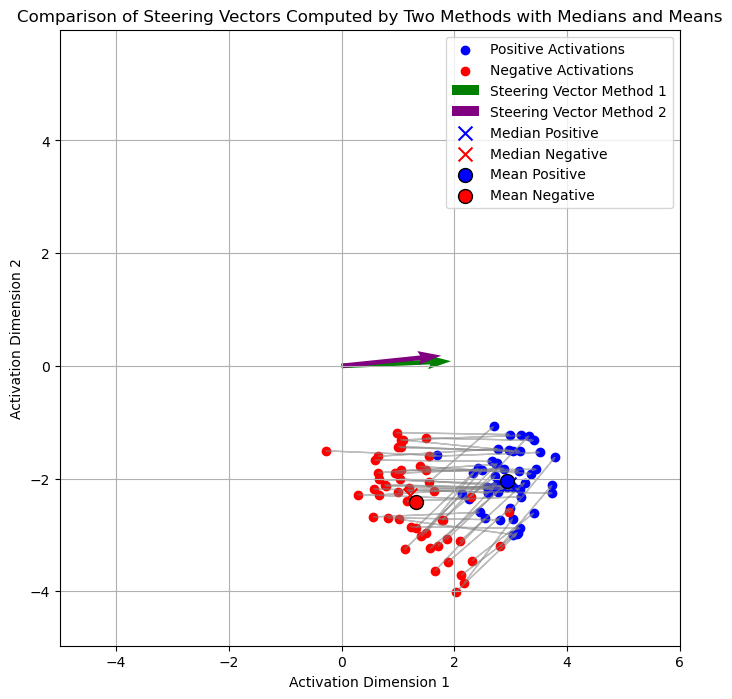

In [263]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
N = 50

# Dimensionality of activations
d = 2

# Generate positive activations (clustered around (2, 2))
A_positive = np.random.randn(N, d) * 0.5 + np.array([2, 2])

# Generate negative activations
# For half of the samples, negative activations are close to positive activations
# For the other half, introduce significant differences to create skewness
A_negative = np.zeros((N, d))

for i in range(N):
    if i < N // 2.5:
        # Negative activations close to positive activations (paired)
        A_negative[i] = A_positive[i] - np.array([1, 1]) + np.random.randn(1, d) * 0.1
    else:
        # Negative activations far from positive activations (outliers)
        A_negative[i] = A_positive[i] - np.array([2, 0]) + np.random.randn(1, d) * 0.1

# Compute differences
Delta = A_positive - A_negative

# Method 1: Dimension-wise median of difference vectors
s_method1 = np.median(Delta, axis=0)

# Method 2: Difference of medians
median_positive = np.median(A_positive, axis=0)
median_negative = np.median(A_negative, axis=0)
s_method2 = median_positive - median_negative

# Mean of positive and negative activations
mean_positive = np.mean(A_positive, axis=0)
mean_negative = np.mean(A_negative, axis=0)

# Apply transformation: move all points 4 downward and 1 to the right
A_positive_transformed = A_positive + np.array([1, -4])
A_negative_transformed = A_negative + np.array([1, -4])
median_positive_transformed = median_positive + np.array([1, -4])
median_negative_transformed = median_negative + np.array([1, -4])
mean_positive_transformed = mean_positive + np.array([1, -4])
mean_negative_transformed = mean_negative + np.array([1, -4])

# Plotting
plt.figure(figsize=(8, 8))

# Plot positive activations
plt.scatter(A_positive_transformed[:, 0], A_positive_transformed[:, 1], color='blue', label='Positive Activations')

# Plot negative activations
plt.scatter(A_negative_transformed[:, 0], A_negative_transformed[:, 1], color='red', label='Negative Activations')

# Plot differences as arrows
for i in range(N):
    plt.arrow(A_negative_transformed[i, 0], A_negative_transformed[i, 1],
              Delta[i, 0], Delta[i, 1],
              color='gray', alpha=0.5, head_width=0.05, length_includes_head=True)

# Plot steering vectors
origin = np.array([[0, 0]])  # Origin point

# Method 1 vector
plt.quiver(*origin.T, s_method1[0], s_method1[1], color='green', scale=1, scale_units='xy', angles='xy', label='Steering Vector Method 1')

# Method 2 vector
plt.quiver(*origin.T, s_method2[0], s_method2[1], color='purple', scale=1, scale_units='xy', angles='xy', label='Steering Vector Method 2')

# Plot median and mean points for both positive and negative activations
plt.scatter(*median_positive_transformed, color='blue', marker='x', s=100, label='Median Positive', zorder=5)
plt.scatter(*median_negative_transformed, color='red', marker='x', s=100, label='Median Negative', zorder=5)
plt.scatter(*mean_positive_transformed, color='blue', marker='o', s=100, edgecolors='black', label='Mean Positive', zorder=5)
plt.scatter(*mean_negative_transformed, color='red', marker='o', s=100, edgecolors='black', label='Mean Negative', zorder=5)

plt.legend()
plt.title('Comparison of Steering Vectors Computed by Two Methods with Medians and Means')
plt.xlabel('Activation Dimension 1')
plt.ylabel('Activation Dimension 2')
plt.grid(True)
plt.axis('equal')
plt.xlim(-5, 6)
plt.ylim(-5, 6)
plt.show()


/var/folders/r8/xkt_dysj3c17w3sk8yw352mm0000gn/T/ipykernel_64147/1330290053.py:30: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(*median_positive_transformed, color='darkblue', marker='x', s=100, edgecolors='black', label='Median Positive', zorder=5, )
/var/folders/r8/xkt_dysj3c17w3sk8yw352mm0000gn/T/ipykernel_64147/1330290053.py:31: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(*median_negative_transformed, color='darkred', marker='x', s=100, edgecolors='black', label='Median Negative', zorder=5)


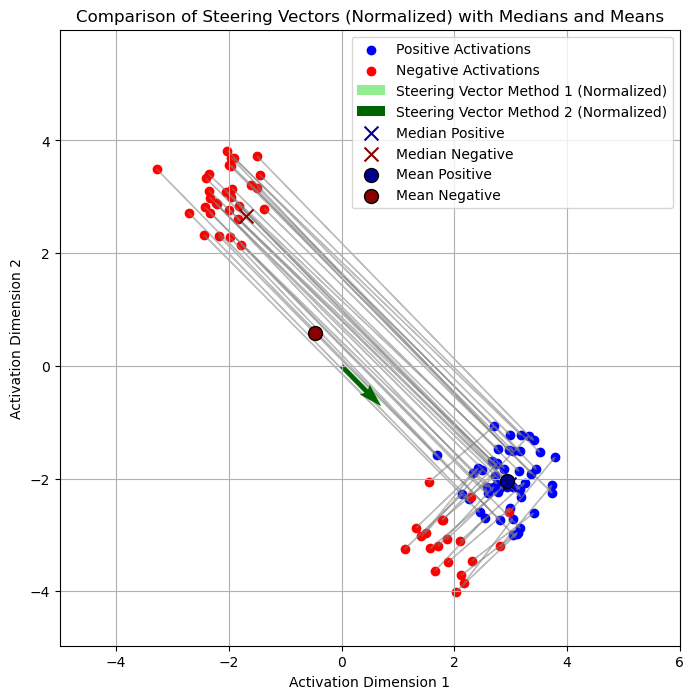

In [260]:
# Normalize the vectors
s_method1_normalized = s_method1 / np.linalg.norm(s_method1)
s_method2_normalized = s_method2 / np.linalg.norm(s_method2)

# Plotting with updated features
plt.figure(figsize=(8, 8))

# Plot positive activations
plt.scatter(A_positive_transformed[:, 0], A_positive_transformed[:, 1], color='blue', label='Positive Activations')

# Plot negative activations
plt.scatter(A_negative_transformed[:, 0], A_negative_transformed[:, 1], color='red', label='Negative Activations')

# Plot differences as arrows
for i in range(N):
    plt.arrow(A_negative_transformed[i, 0], A_negative_transformed[i, 1],
              Delta[i, 0], Delta[i, 1],
              color='gray', alpha=0.5, head_width=0.05, length_includes_head=True)

# Plot steering vectors (normalized)
origin = np.array([[0, 0]])  # Origin point

# Method 1 vector (light green)
plt.quiver(*origin.T, s_method1_normalized[0], s_method1_normalized[1], color='lightgreen', scale=1, scale_units='xy', angles='xy', label='Steering Vector Method 1 (Normalized)')

# Method 2 vector (dark green)
plt.quiver(*origin.T, s_method2_normalized[0], s_method2_normalized[1], color='darkgreen', scale=1, scale_units='xy', angles='xy', label='Steering Vector Method 2 (Normalized)')

# Plot median and mean points for both positive and negative activations
plt.scatter(*median_positive_transformed, color='darkblue', marker='x', s=100, edgecolors='black', label='Median Positive', zorder=5, )
plt.scatter(*median_negative_transformed, color='darkred', marker='x', s=100, edgecolors='black', label='Median Negative', zorder=5)
plt.scatter(*mean_positive_transformed, color='darkblue', marker='o', s=100, edgecolors='black', label='Mean Positive', zorder=5)
plt.scatter(*mean_negative_transformed, color='darkred', marker='o', s=100, edgecolors='black', label='Mean Negative', zorder=5)

plt.legend()
plt.title('Comparison of Steering Vectors (Normalized) with Medians and Means')
plt.xlabel('Activation Dimension 1')
plt.ylabel('Activation Dimension 2')
plt.grid(True)
plt.axis('equal')
plt.xlim(-5, 6)
plt.ylim(-5, 6)
plt.show()


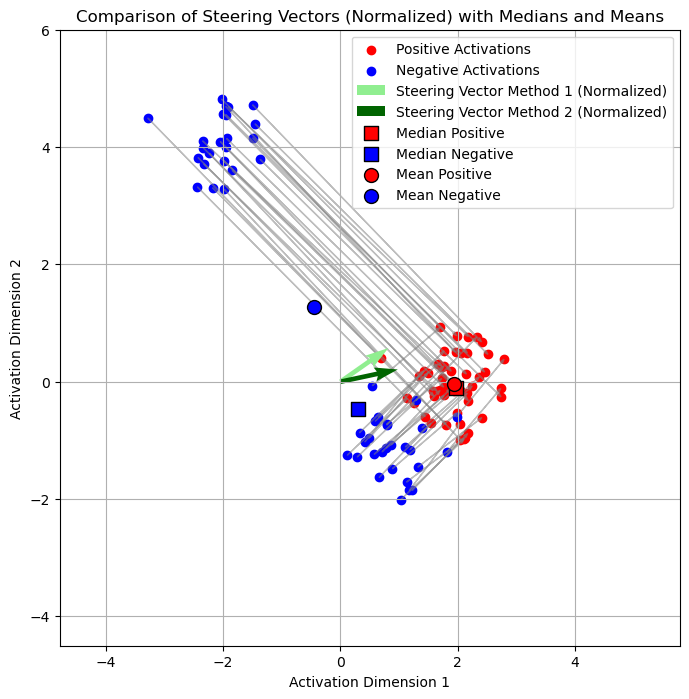

In [293]:
# Defining the functions to handle plotting, steering vector normalization, and data transformation

import numpy as np
import matplotlib.pyplot as plt

# Function to normalize vectors
def normalize_vector(v):
    return v / np.linalg.norm(v)

# Function to generate data
def generate_data(N, d, positive_center, skewness_threshold=2.5):
    A_positive = np.random.randn(N, d) * 0.5 + positive_center
    A_negative = np.zeros((N, d))
    
    for i in range(N):
        if i < N // skewness_threshold:
            A_negative[i] = A_positive[i] - np.array([1, 1]) + np.random.randn(1, d) * 0.1
        else:
            A_negative[i] = A_positive[i] - np.array([4, -4]) + np.random.randn(1, d) * 0.1
    
    return A_positive, A_negative

# Function to compute steering vectors
def compute_steering_vectors(A_positive, A_negative):
    Delta = A_positive - A_negative
    s_method1 = np.median(Delta, axis=0)
    median_positive = np.median(A_positive, axis=0)
    median_negative = np.median(A_negative, axis=0)
    s_method2 = median_positive - median_negative
    
    return Delta, s_method1, s_method2, median_positive, median_negative

# Function to apply transformations and plot the result
def plot_activations_and_vectors(A_positive, A_negative, Delta, s_method1, s_method2, median_positive, median_negative, mean_positive, mean_negative):
    # Apply transformation: move all points 4 downward and 1 to the right
    A_positive_transformed = A_positive + np.array([1, -4])
    A_negative_transformed = A_negative + np.array([1, -4])
    median_positive_transformed = median_positive + np.array([1, -4])
    median_negative_transformed = median_negative + np.array([1, -4])
    mean_positive_transformed = mean_positive + np.array([1, -4])
    mean_negative_transformed = mean_negative + np.array([1, -4])
    
    # Normalize the steering vectors
    s_method1_normalized = normalize_vector(s_method1)
    s_method2_normalized = normalize_vector(s_method2)
    
    # Plotting
    plt.figure(figsize=(8, 8))
    
    # Plot positive activations (red) and negative activations (blue)
    plt.scatter(A_positive_transformed[:, 0], A_positive_transformed[:, 1], color='red', label='Positive Activations')
    plt.scatter(A_negative_transformed[:, 0], A_negative_transformed[:, 1], color='blue', label='Negative Activations')
    
    # Plot differences as arrows (vector from negative to positive)
    for i in range(len(A_positive)):
        plt.arrow(A_negative_transformed[i, 0], A_negative_transformed[i, 1],
                  Delta[i, 0], Delta[i, 1],
                  color='gray', alpha=0.5, head_width=0.05, length_includes_head=True)
    
    # Plot steering vectors (light green and dark green)
    origin = np.array([[0, 0]])  # Origin point
    plt.quiver(*origin.T, s_method1_normalized[0], s_method1_normalized[1], color='lightgreen', scale=1, scale_units='xy', angles='xy', label='Steering Vector Method 1 (Normalized)')
    plt.quiver(*origin.T, s_method2_normalized[0], s_method2_normalized[1], color='darkgreen', scale=1, scale_units='xy', angles='xy', label='Steering Vector Method 2 (Normalized)')
    
    # Plot median and mean points for both positive and negative activations
    plt.scatter(*median_positive_transformed, color='red', marker='s', s=100, edgecolors='black', label='Median Positive', zorder=5)
    plt.scatter(*median_negative_transformed, color='blue', marker='s', s=100, edgecolors='black', label='Median Negative', zorder=5)
    plt.scatter(*mean_positive_transformed, color='red', marker='o', s=100, edgecolors='black', label='Mean Positive', zorder=5)
    plt.scatter(*mean_negative_transformed, color='blue', marker='o', s=100, edgecolors='black', label='Mean Negative', zorder=5)
    
    # Set plot labels, title, and legend
    plt.legend(loc='upper right')
    plt.title('Comparison of Steering Vectors (Normalized) with Medians and Means')
    plt.xlabel('Activation Dimension 1')
    plt.ylabel('Activation Dimension 2')
    plt.grid(True)
    plt.axis('equal')
    plt.xlim(-5, 6)
    plt.ylim(-4.5, 6)
    plt.show()

# Main execution flow
np.random.seed(42)  # Set seed for reproducibility
N = 50  # Number of samples
d = 2  # Dimensionality of activations

# Generate data
A_positive, A_negative = generate_data(N, d, positive_center=np.array([1, 4]), skewness_threshold=1.85)

# Compute differences, steering vectors, medians, and means
Delta, s_method1, s_method2, median_positive, median_negative = compute_steering_vectors(A_positive, A_negative)
mean_positive = np.mean(A_positive, axis=0)
mean_negative = np.mean(A_negative, axis=0)

# Plot the result
plot_activations_and_vectors(A_positive, A_negative, Delta, s_method1, s_method2, median_positive, median_negative, mean_positive, mean_negative)


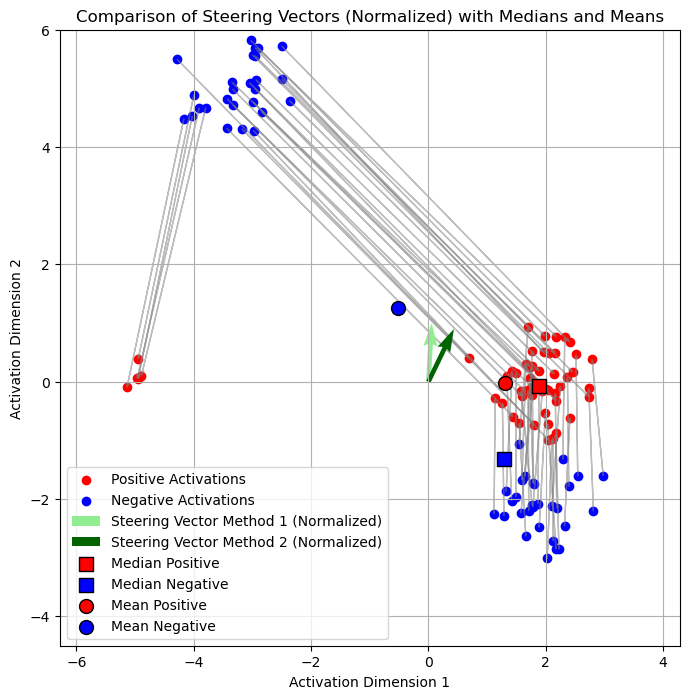

In [309]:
import numpy as np
import matplotlib.pyplot as plt

# Function to normalize vectors
def normalize_vector(v):
    return v / np.linalg.norm(v)

# Function to generate data
def generate_data(N, d, positive_center, skewness_threshold=2.5):
    A_positive = np.random.randn(N, d) * 0.5 + positive_center
    A_negative = np.zeros((N, d))
    
    for i in range(N):
        if i < N // skewness_threshold:
            A_negative[i] = A_positive[i] - np.array([0, 2]) + np.random.randn(1, d) * 0.1
        else:
            A_negative[i] = A_positive[i] - np.array([5, -5]) + np.random.randn(1, d) * 0.1
    
    return A_positive, A_negative

# Function to compute steering vectors
def compute_steering_vectors(A_positive, A_negative):
    Delta = A_positive - A_negative
    s_method1 = np.median(Delta, axis=0)
    median_positive = np.median(A_positive, axis=0)
    median_negative = np.median(A_negative, axis=0)
    s_method2 = median_positive - median_negative
    
    return Delta, s_method1, s_method2, median_positive, median_negative

# Function to apply transformations and plot the result
def plot_activations_and_vectors(A_positive, A_negative, Delta, s_method1, s_method2, median_positive, median_negative, mean_positive, mean_negative):
    # Apply transformation: move all points 4 downward and 1 to the right
    A_positive_transformed = A_positive + np.array([1, -4])
    A_negative_transformed = A_negative + np.array([1, -4])
    median_positive_transformed = median_positive + np.array([1, -4])
    median_negative_transformed = median_negative + np.array([1, -4])
    mean_positive_transformed = mean_positive + np.array([1, -4])
    mean_negative_transformed = mean_negative + np.array([1, -4])
    
    # Normalize the steering vectors
    s_method1_normalized = normalize_vector(s_method1)
    s_method2_normalized = normalize_vector(s_method2)
    
    # Plotting
    plt.figure(figsize=(8, 8))
    
    # Plot positive activations (red) and negative activations (blue)
    plt.scatter(A_positive_transformed[:, 0], A_positive_transformed[:, 1], color='red', label='Positive Activations')
    plt.scatter(A_negative_transformed[:, 0], A_negative_transformed[:, 1], color='blue', label='Negative Activations')
    
    # Plot differences as arrows (vector from negative to positive)
    for i in range(len(A_positive)):
        plt.arrow(A_negative_transformed[i, 0], A_negative_transformed[i, 1],
                  Delta[i, 0], Delta[i, 1],
                  color='gray', alpha=0.5, head_width=0.05, length_includes_head=True)
    
    # Plot steering vectors (light green and dark green)
    origin = np.array([[0, 0]])  # Origin point
    plt.quiver(*origin.T, s_method1_normalized[0], s_method1_normalized[1], color='lightgreen', scale=1, scale_units='xy', angles='xy', label='Steering Vector Method 1 (Normalized)')
    plt.quiver(*origin.T, s_method2_normalized[0], s_method2_normalized[1], color='darkgreen', scale=1, scale_units='xy', angles='xy', label='Steering Vector Method 2 (Normalized)')
    
    # Plot median and mean points for both positive and negative activations
    plt.scatter(*median_positive_transformed, color='red', marker='s', s=100, edgecolors='black', label='Median Positive', zorder=5)
    plt.scatter(*median_negative_transformed, color='blue', marker='s', s=100, edgecolors='black', label='Median Negative', zorder=5)
    plt.scatter(*mean_positive_transformed, color='red', marker='o', s=100, edgecolors='black', label='Mean Positive', zorder=5)
    plt.scatter(*mean_negative_transformed, color='blue', marker='o', s=100, edgecolors='black', label='Mean Negative', zorder=5)
    
    # Set plot labels, title, and legend
    plt.legend(loc='lower left')
    plt.title('Comparison of Steering Vectors (Normalized) with Medians and Means')
    plt.xlabel('Activation Dimension 1')
    plt.ylabel('Activation Dimension 2')
    plt.grid(True)
    plt.axis('equal')
    plt.xlim(-5, 3)
    plt.ylim(-4.5, 6)
    plt.show()

# Main execution flow
np.random.seed(42)  # Set seed for reproducibility
N = 50  # Number of samples
d = 2  # Dimensionality of activations

# Generate data
A_positive, A_negative = generate_data(N, d, positive_center=np.array([1, 4]), skewness_threshold=1.70)

# Add positive outliers around (0, -4)
positive_outliers = np.random.randn(5, d) * 0.1 + np.array([-6, 4])
A_positive = np.vstack([A_positive, positive_outliers])

# Generate corresponding negative activations for the outliers
negative_outliers = positive_outliers + np.array([1, 4.5]) + np.random.randn(5, d) * 0.1
A_negative = np.vstack([A_negative, negative_outliers])

# Compute differences, steering vectors, medians, and means
Delta, s_method1, s_method2, median_positive, median_negative = compute_steering_vectors(A_positive, A_negative)
mean_positive = np.mean(A_positive, axis=0)
mean_negative = np.mean(A_negative, axis=0)

# Plot the result
plot_activations_and_vectors(A_positive, A_negative, Delta, s_method1, s_method2, median_positive, median_negative, mean_positive, mean_negative)


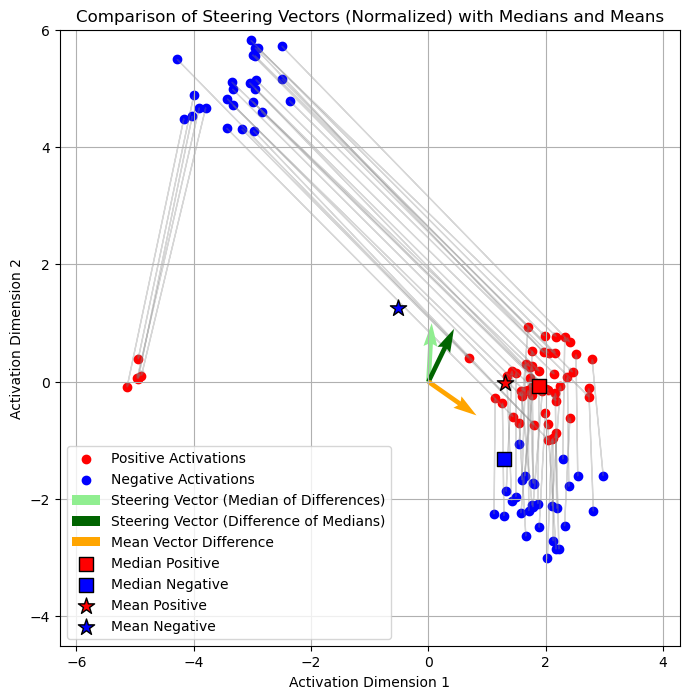

In [312]:
import numpy as np
import matplotlib.pyplot as plt

# Function to normalize vectors
def normalize_vector(v):
    return v / np.linalg.norm(v)

# Function to generate data
def generate_data(N, d, positive_center, skewness_threshold=2.5):
    A_positive = np.random.randn(N, d) * 0.5 + positive_center
    A_negative = np.zeros((N, d))
    
    for i in range(N):
        if i < N // skewness_threshold:
            A_negative[i] = A_positive[i] - np.array([0, 2]) + np.random.randn(1, d) * 0.1
        else:
            A_negative[i] = A_positive[i] - np.array([5, -5]) + np.random.randn(1, d) * 0.1
    
    return A_positive, A_negative

# Function to compute steering vectors
def compute_steering_vectors(A_positive, A_negative):
    Delta = A_positive - A_negative
    s_method1 = np.median(Delta, axis=0)
    median_positive = np.median(A_positive, axis=0)
    median_negative = np.median(A_negative, axis=0)
    s_method2 = median_positive - median_negative
    
    return Delta, s_method1, s_method2, median_positive, median_negative

# Function to apply transformations and plot the result
def plot_activations_and_vectors(A_positive, A_negative, Delta, s_method1, s_method2, median_positive, median_negative, mean_positive, mean_negative):
    # Apply transformation: move all points 4 downward and 1 to the right
    A_positive_transformed = A_positive + np.array([1, -4])
    A_negative_transformed = A_negative + np.array([1, -4])
    median_positive_transformed = median_positive + np.array([1, -4])
    median_negative_transformed = median_negative + np.array([1, -4])
    mean_positive_transformed = mean_positive + np.array([1, -4])
    mean_negative_transformed = mean_negative + np.array([1, -4])
    
    # Normalize the steering vectors
    s_method1_normalized = normalize_vector(s_method1)
    s_method2_normalized = normalize_vector(s_method2)
    
    # Compute mean vector difference (mean_positive - mean_negative)
    mean_vector = mean_positive - mean_negative
    mean_vector_normalized = normalize_vector(mean_vector)
    
    # Plotting
    plt.figure(figsize=(8, 8))
    
    # Plot positive activations (red) and negative activations (blue)
    plt.scatter(A_positive_transformed[:, 0], A_positive_transformed[:, 1], color='red', label='Positive Activations')
    plt.scatter(A_negative_transformed[:, 0], A_negative_transformed[:, 1], color='blue', label='Negative Activations')
    
    # Plot differences as arrows (vector from negative to positive)
    for i in range(len(A_positive)):
        plt.arrow(A_negative_transformed[i, 0], A_negative_transformed[i, 1],
                  Delta[i, 0], Delta[i, 1],
                  color='gray', alpha=0.3, head_width=0.05, length_includes_head=True)
    
    # Plot steering vectors (light green and dark green)
    origin = np.array([[0, 0]])  # Origin point
    plt.quiver(*origin.T, s_method1_normalized[0], s_method1_normalized[1], color='lightgreen', scale=1, scale_units='xy', angles='xy', label='Steering Vector (Median of Differences)')
    plt.quiver(*origin.T, s_method2_normalized[0], s_method2_normalized[1], color='darkgreen', scale=1, scale_units='xy', angles='xy', label='Steering Vector (Difference of Medians)')
    plt.quiver(*origin.T, mean_vector_normalized[0], mean_vector_normalized[1], color='orange', scale=1, scale_units='xy', angles='xy', label='Mean Vector Difference')
    
    # Plot median and mean points for both positive and negative activations
    plt.scatter(*median_positive_transformed, color='red', marker='s', s=100, edgecolors='black', label='Median Positive', zorder=5)
    plt.scatter(*median_negative_transformed, color='blue', marker='s', s=100, edgecolors='black', label='Median Negative', zorder=5)
    plt.scatter(*mean_positive_transformed, color='red', marker='*', s=150, edgecolors='black', label='Mean Positive', zorder=5)
    plt.scatter(*mean_negative_transformed, color='blue', marker='*', s=150, edgecolors='black', label='Mean Negative', zorder=5)
    
    # Set plot labels, title, and legend
    plt.legend(loc='lower left')
    plt.title('Comparison of Steering Vectors (Normalized) with Medians and Means')
    plt.xlabel('Activation Dimension 1')
    plt.ylabel('Activation Dimension 2')
    plt.grid(True)
    plt.axis('equal')
    plt.xlim(-5, 3)
    plt.ylim(-4.5, 6)
    plt.show()

# Main execution flow
np.random.seed(42)  # Set seed for reproducibility
N = 50  # Number of samples
d = 2  # Dimensionality of activations

# Generate data
A_positive, A_negative = generate_data(N, d, positive_center=np.array([1, 4]), skewness_threshold=1.70)

# Add positive outliers around (-6, 4)
positive_outliers = np.random.randn(5, d) * 0.1 + np.array([-6, 4])
A_positive = np.vstack([A_positive, positive_outliers])

# Generate corresponding negative activations for the outliers
negative_outliers = positive_outliers + np.array([1, 4.5]) + np.random.randn(5, d) * 0.1
A_negative = np.vstack([A_negative, negative_outliers])

# Compute differences, steering vectors, medians, and means
Delta, s_method1, s_method2, median_positive, median_negative = compute_steering_vectors(A_positive, A_negative)
mean_positive = np.mean(A_positive, axis=0)
mean_negative = np.mean(A_negative, axis=0)

# Plot the result
plot_activations_and_vectors(A_positive, A_negative, Delta, s_method1, s_method2, median_positive, median_negative, mean_positive, mean_negative)


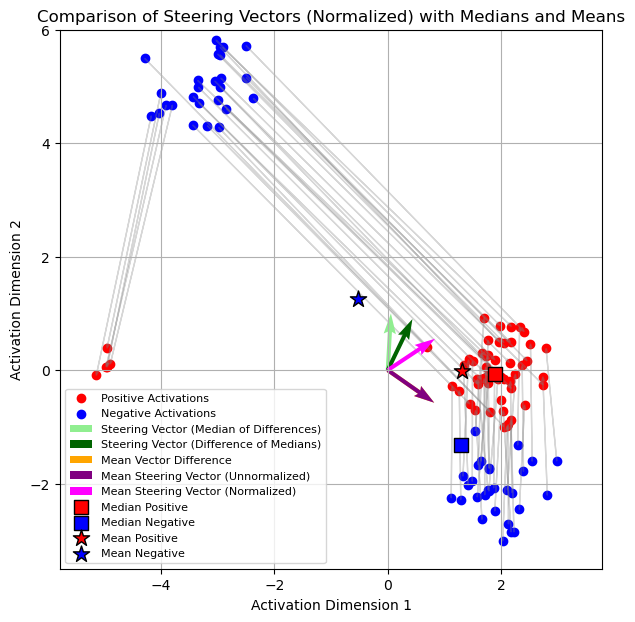

In [326]:
import numpy as np
import matplotlib.pyplot as plt

# Function to normalize vectors
def normalize_vector(v):
    return v / np.linalg.norm(v)

# Function to generate data
def generate_data(N, d, positive_center, skewness_threshold=2.5):
    A_positive = np.random.randn(N, d) * 0.5 + positive_center
    A_negative = np.zeros((N, d))
    
    for i in range(N):
        if i < N // skewness_threshold:
            A_negative[i] = A_positive[i] - np.array([0, 2]) + np.random.randn(1, d) * 0.1
        else:
            A_negative[i] = A_positive[i] - np.array([5, -5]) + np.random.randn(1, d) * 0.1
    
    return A_positive, A_negative

# Function to compute steering vectors
def compute_steering_vectors(A_positive, A_negative):
    Delta = A_positive - A_negative
    s_method1 = np.median(Delta, axis=0)
    median_positive = np.median(A_positive, axis=0)
    median_negative = np.median(A_negative, axis=0)
    s_method2 = median_positive - median_negative
    
    # Compute unnormalized mean steering vector
    s_mean_unnormalized = np.mean(Delta, axis=0)
    
    # Compute normalized mean steering vector
    normalized_differences = Delta / np.linalg.norm(Delta, axis=1)[:, np.newaxis]
    s_mean_normalized = np.mean(normalized_differences, axis=0)
    
    return Delta, s_method1, s_method2, median_positive, median_negative, s_mean_unnormalized, s_mean_normalized

# Function to apply transformations and plot the result
def plot_activations_and_vectors(A_positive, A_negative, Delta, s_method1, s_method2, median_positive, median_negative, mean_positive, mean_negative, s_mean_unnormalized, s_mean_normalized):
    # Apply transformation: move all points 4 downward and 1 to the right
    A_positive_transformed = A_positive + np.array([1, -4])
    A_negative_transformed = A_negative + np.array([1, -4])
    median_positive_transformed = median_positive + np.array([1, -4])
    median_negative_transformed = median_negative + np.array([1, -4])
    mean_positive_transformed = mean_positive + np.array([1, -4])
    mean_negative_transformed = mean_negative + np.array([1, -4])
    
    # Normalize the steering vectors
    s_method1_normalized = normalize_vector(s_method1)
    s_method2_normalized = normalize_vector(s_method2)
    s_mean_unnormalized_normalized = normalize_vector(s_mean_unnormalized)
    s_mean_normalized_normalized = normalize_vector(s_mean_normalized)
    
    # Compute mean vector difference (mean_positive - mean_negative)
    mean_vector = mean_positive - mean_negative
    mean_vector_normalized = normalize_vector(mean_vector)
    
    # Plotting
    plt.figure(figsize=(7, 7))
    
    # Plot positive activations (red) and negative activations (blue)
    plt.scatter(A_positive_transformed[:, 0], A_positive_transformed[:, 1], color='red', label='Positive Activations')
    plt.scatter(A_negative_transformed[:, 0], A_negative_transformed[:, 1], color='blue', label='Negative Activations')
    
    # Plot differences as arrows (vector from negative to positive)
    for i in range(len(A_positive)):
        plt.arrow(A_negative_transformed[i, 0], A_negative_transformed[i, 1],
                  Delta[i, 0], Delta[i, 1],
                  color='gray', alpha=0.3, head_width=0.05, length_includes_head=True)
    
    # Plot steering vectors
    origin = np.array([[0, 0]])  # Origin point
    plt.quiver(*origin.T, s_method1_normalized[0], s_method1_normalized[1], color='lightgreen', scale=1, scale_units='xy', angles='xy', label='Steering Vector (Median of Differences)')
    plt.quiver(*origin.T, s_method2_normalized[0], s_method2_normalized[1], color='darkgreen', scale=1, scale_units='xy', angles='xy', label='Steering Vector (Difference of Medians)')
    plt.quiver(*origin.T, mean_vector_normalized[0], mean_vector_normalized[1], color='orange', scale=1, scale_units='xy', angles='xy', label='Mean Vector Difference')
    plt.quiver(*origin.T, s_mean_unnormalized_normalized[0], s_mean_unnormalized_normalized[1], color='purple', scale=1, scale_units='xy', angles='xy', label='Mean Steering Vector (Unnormalized)')
    plt.quiver(*origin.T, s_mean_normalized_normalized[0], s_mean_normalized_normalized[1], color='magenta', scale=1, scale_units='xy', angles='xy', label='Mean Steering Vector (Normalized)')
    
    # Plot median and mean points for both positive and negative activations
    plt.scatter(*median_positive_transformed, color='red', marker='s', s=100, edgecolors='black', label='Median Positive', zorder=5)
    plt.scatter(*median_negative_transformed, color='blue', marker='s', s=100, edgecolors='black', label='Median Negative', zorder=5)
    plt.scatter(*mean_positive_transformed, color='red', marker='*', s=150, edgecolors='black', label='Mean Positive', zorder=5)
    plt.scatter(*mean_negative_transformed, color='blue', marker='*', s=150, edgecolors='black', label='Mean Negative', zorder=5)
    
    # Set plot labels, title, and legend
    plt.legend(loc='lower left', fontsize=8)
    plt.title('Comparison of Steering Vectors (Normalized) with Medians and Means')
    plt.xlabel('Activation Dimension 1')
    plt.ylabel('Activation Dimension 2')
    plt.grid(True)
    plt.axis('equal')
    plt.xlim(-2, 0)
    plt.ylim(-3.5, 6)
    plt.show()

# Main execution flow
np.random.seed(42)  # Set seed for reproducibility
N = 50  # Number of samples
d = 2  # Dimensionality of activations

# Generate data
A_positive, A_negative = generate_data(N, d, positive_center=np.array([1, 4]), skewness_threshold=1.70)

# Add positive outliers around (-6, 4)
positive_outliers = np.random.randn(5, d) * 0.1 + np.array([-6, 4])
A_positive = np.vstack([A_positive, positive_outliers])

# Generate corresponding negative activations for the outliers
negative_outliers = positive_outliers + np.array([1, 4.5]) + np.random.randn(5, d) * 0.1
A_negative = np.vstack([A_negative, negative_outliers])

# Compute differences, steering vectors, medians, and means
Delta, s_method1, s_method2, median_positive, median_negative, s_mean_unnormalized, s_mean_normalized = compute_steering_vectors(A_positive, A_negative)
mean_positive = np.mean(A_positive, axis=0)
mean_negative = np.mean(A_negative, axis=0)

# Plot the result
plot_activations_and_vectors(A_positive, A_negative, Delta, s_method1, s_method2, median_positive, median_negative, mean_positive, mean_negative, s_mean_unnormalized, s_mean_normalized)

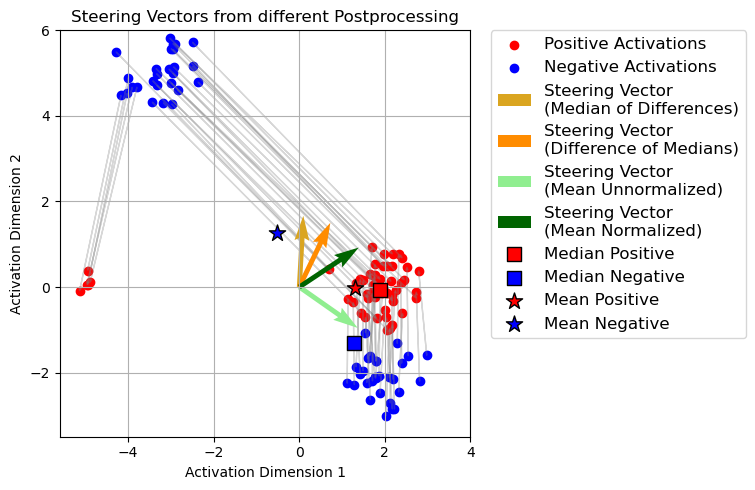

In [348]:
import numpy as np
import matplotlib.pyplot as plt

# Function to normalize vectors
def normalize_vector(v):
    return v / np.linalg.norm(v)

# Function to generate data
def generate_data(N, d, positive_center, skewness_threshold=2.5):
    A_positive = np.random.randn(N, d) * 0.5 + positive_center
    A_negative = np.zeros((N, d))
    
    for i in range(N):
        if i < N // skewness_threshold:
            A_negative[i] = A_positive[i] - np.array([0, 2]) + np.random.randn(1, d) * 0.1
        else:
            A_negative[i] = A_positive[i] - np.array([5, -5]) + np.random.randn(1, d) * 0.1
    
    return A_positive, A_negative

# Function to compute steering vectors
def compute_steering_vectors(A_positive, A_negative):
    Delta = A_positive - A_negative
    s_method1 = np.median(Delta, axis=0)
    median_positive = np.median(A_positive, axis=0)
    median_negative = np.median(A_negative, axis=0)
    s_method2 = median_positive - median_negative
    
    # Compute unnormalized mean steering vector
    s_mean_unnormalized = np.mean(Delta, axis=0)
    
    # Compute normalized mean steering vector
    normalized_differences = Delta / np.linalg.norm(Delta, axis=1)[:, np.newaxis]
    s_mean_normalized = np.mean(normalized_differences, axis=0)
    
    return Delta, s_method1, s_method2, median_positive, median_negative, s_mean_unnormalized, s_mean_normalized

# Function to apply transformations and plot the result
def plot_activations_and_vectors(A_positive, A_negative, Delta, s_method1, s_method2, median_positive, median_negative, mean_positive, mean_negative, s_mean_unnormalized, s_mean_normalized):
    # Apply transformation: move all points 4 downward and 1 to the right
    A_positive_transformed = A_positive + np.array([1, -4])
    A_negative_transformed = A_negative + np.array([1, -4])
    median_positive_transformed = median_positive + np.array([1, -4])
    median_negative_transformed = median_negative + np.array([1, -4])
    mean_positive_transformed = mean_positive + np.array([1, -4])
    mean_negative_transformed = mean_negative + np.array([1, -4])
    
    # Normalize the steering vectors
    s_method1_normalized = normalize_vector(s_method1)
    s_method2_normalized = normalize_vector(s_method2)
    s_mean_unnormalized_normalized = normalize_vector(s_mean_unnormalized)
    s_mean_normalized_normalized = normalize_vector(s_mean_normalized)
    
    # Compute mean vector difference (mean_positive - mean_negative)
    mean_vector = mean_positive - mean_negative
    mean_vector_normalized = normalize_vector(mean_vector)
    
    # Plotting
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # Plot positive activations (red) and negative activations (blue)
    ax.scatter(A_positive_transformed[:, 0], A_positive_transformed[:, 1], color='red', label='Positive Activations')
    ax.scatter(A_negative_transformed[:, 0], A_negative_transformed[:, 1], color='blue', label='Negative Activations')
    
    # Plot differences as arrows (vector from negative to positive)
    for i in range(len(A_positive)):
        ax.arrow(A_negative_transformed[i, 0], A_negative_transformed[i, 1],
                 Delta[i, 0], Delta[i, 1],
                 color='gray', alpha=0.3, head_width=0.05, length_includes_head=True)
    
    # Plot steering vectors with updated colors
    origin = np.array([[0, 0]])  # Origin point
    ax.quiver(*origin.T, s_method1_normalized[0], s_method1_normalized[1], color='#DAA520', width=0.012,
              scale=0.6, scale_units='xy', angles='xy', label='Steering Vector\n(Median of Differences)')
    ax.quiver(*origin.T, s_method2_normalized[0], s_method2_normalized[1], color='#FF8C00', width=0.012,
              scale=0.6, scale_units='xy', angles='xy', label='Steering Vector\n(Difference of Medians)')
    ax.quiver(*origin.T, s_mean_unnormalized_normalized[0], s_mean_unnormalized_normalized[1], color='#90EE90', width=0.012,
              scale=0.6, scale_units='xy', angles='xy', label='Steering Vector\n(Mean Unnormalized)')
    ax.quiver(*origin.T, s_mean_normalized_normalized[0], s_mean_normalized_normalized[1], color='#006400', width=0.012,
              scale=0.6, scale_units='xy', angles='xy', label='Steering Vector\n(Mean Normalized)')
    
    # Plot median and mean points for both positive and negative activations
    ax.scatter(*median_positive_transformed, color='red', marker='s', s=100, edgecolors='black', label='Median Positive', zorder=5)
    ax.scatter(*median_negative_transformed, color='blue', marker='s', s=100, edgecolors='black', label='Median Negative', zorder=5)
    ax.scatter(*mean_positive_transformed, color='red', marker='*', s=150, edgecolors='black', label='Mean Positive', zorder=5)
    ax.scatter(*mean_negative_transformed, color='blue', marker='*', s=150, edgecolors='black', label='Mean Negative', zorder=5)
    
    # Set plot labels, title, and legend
    ax.set_title('Steering Vectors from different Postprocessing')
    ax.set_xlabel('Activation Dimension 1')
    ax.set_ylabel('Activation Dimension 2')
    ax.grid(True)
    ax.set_aspect('equal')
    ax.set_xlim(-5.6, 4)
    ax.set_ylim(-3.5, 6)
    
    # Move legend outside the plot
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=12)
    
    # Adjust layout to prevent clipping of tick-labels
    plt.tight_layout()
    
    plt.show()


# Main execution flow
np.random.seed(42)  # Set seed for reproducibility
N = 50  # Number of samples
d = 2  # Dimensionality of activations

# Generate data
A_positive, A_negative = generate_data(N, d, positive_center=np.array([1, 4]), skewness_threshold=1.70)

# Add positive outliers around (-6, 4)
positive_outliers = np.random.randn(5, d) * 0.1 + np.array([-6, 4])
A_positive = np.vstack([A_positive, positive_outliers])

# Generate corresponding negative activations for the outliers
negative_outliers = positive_outliers + np.array([1, 4.5]) + np.random.randn(5, d) * 0.1
A_negative = np.vstack([A_negative, negative_outliers])

# Compute differences, steering vectors, medians, and means
Delta, s_method1, s_method2, median_positive, median_negative, s_mean_unnormalized, s_mean_normalized = compute_steering_vectors(A_positive, A_negative)
mean_positive = np.mean(A_positive, axis=0)
mean_negative = np.mean(A_negative, axis=0)

# Plot the result
plot_activations_and_vectors(A_positive, A_negative, Delta, s_method1, s_method2, median_positive, median_negative, mean_positive, mean_negative, s_mean_unnormalized, s_mean_normalized)

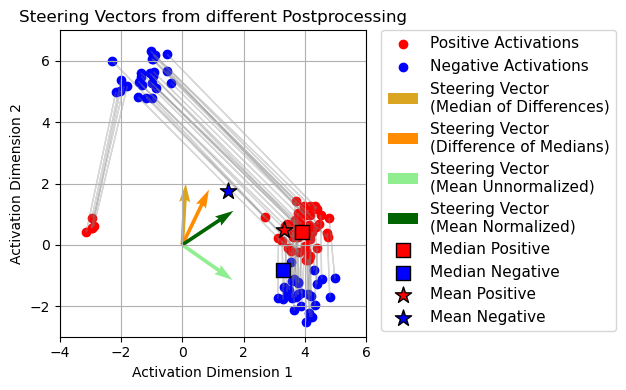

In [368]:
import numpy as np
import matplotlib.pyplot as plt

# Function to normalize vectors
def normalize_vector(v):
    return v / np.linalg.norm(v)

# Function to generate data
def generate_data(N, d, positive_center, skewness_threshold=2.5):
    A_positive = np.random.randn(N, d) * 0.5 + positive_center
    A_negative = np.zeros((N, d))
    
    for i in range(N):
        if i < N // skewness_threshold:
            A_negative[i] = A_positive[i] - np.array([0, 2]) + np.random.randn(1, d) * 0.1
        else:
            A_negative[i] = A_positive[i] - np.array([5, -5]) + np.random.randn(1, d) * 0.1
    
    return A_positive, A_negative

# Function to compute steering vectors
def compute_steering_vectors(A_positive, A_negative):
    Delta = A_positive - A_negative
    s_method1 = np.median(Delta, axis=0)
    median_positive = np.median(A_positive, axis=0)
    median_negative = np.median(A_negative, axis=0)
    s_method2 = median_positive - median_negative
    
    # Compute unnormalized mean steering vector
    s_mean_unnormalized = np.mean(Delta, axis=0)
    
    # Compute normalized mean steering vector
    normalized_differences = Delta / np.linalg.norm(Delta, axis=1)[:, np.newaxis]
    s_mean_normalized = np.mean(normalized_differences, axis=0)
    
    return Delta, s_method1, s_method2, median_positive, median_negative, s_mean_unnormalized, s_mean_normalized

# Function to apply transformations and plot the result
def plot_activations_and_vectors(A_positive, A_negative, Delta, s_method1, s_method2, median_positive, median_negative, mean_positive, mean_negative, s_mean_unnormalized, s_mean_normalized):
    # Apply transformation: move all points 3 to the right and 1 up
    transform = np.array([3, -3.5])
    A_positive_transformed = A_positive + transform
    A_negative_transformed = A_negative + transform
    median_positive_transformed = median_positive + transform
    median_negative_transformed = median_negative + transform
    mean_positive_transformed = mean_positive + transform
    mean_negative_transformed = mean_negative + transform
    
    # Normalize the steering vectors
    s_method1_normalized = normalize_vector(s_method1)
    s_method2_normalized = normalize_vector(s_method2)
    s_mean_unnormalized_normalized = normalize_vector(s_mean_unnormalized)
    s_mean_normalized_normalized = normalize_vector(s_mean_normalized)
    
    # Plotting
    fig, ax = plt.subplots(figsize=(8, 4))
    
    # Plot positive activations (red) and negative activations (blue)
    ax.scatter(A_positive_transformed[:, 0], A_positive_transformed[:, 1], color='red', label='Positive Activations')
    ax.scatter(A_negative_transformed[:, 0], A_negative_transformed[:, 1], color='blue', label='Negative Activations')
    
    # Plot differences as arrows (vector from negative to positive)
    for i in range(len(A_positive)):
        ax.arrow(A_negative_transformed[i, 0], A_negative_transformed[i, 1],
                 Delta[i, 0], Delta[i, 1],
                 color='gray', alpha=0.3, head_width=0.05, length_includes_head=True)
    
    # Plot steering vectors with updated colors, starting from the origin
    origin = np.array([[0, 0]])  # Origin point (0,0)
    ax.quiver(*origin.T, s_method1_normalized[0], s_method1_normalized[1], color='#DAA520', width=0.012,
              scale=0.5, scale_units='xy', angles='xy', label='Steering Vector\n(Median of Differences)')
    ax.quiver(*origin.T, s_method2_normalized[0], s_method2_normalized[1], color='#FF8C00', width=0.012,
              scale=0.5, scale_units='xy', angles='xy', label='Steering Vector\n(Difference of Medians)')
    ax.quiver(*origin.T, s_mean_unnormalized_normalized[0], s_mean_unnormalized_normalized[1], color='#90EE90', width=0.012,
              scale=0.5, scale_units='xy', angles='xy', label='Steering Vector\n(Mean Unnormalized)')
    ax.quiver(*origin.T, s_mean_normalized_normalized[0], s_mean_normalized_normalized[1], color='#006400', width=0.012,
              scale=0.5, scale_units='xy', angles='xy', label='Steering Vector\n(Mean Normalized)')
    
    # Plot median and mean points for both positive and negative activations
    ax.scatter(*median_positive_transformed, color='red', marker='s', s=100, edgecolors='black', label='Median Positive', zorder=5)
    ax.scatter(*median_negative_transformed, color='blue', marker='s', s=100, edgecolors='black', label='Median Negative', zorder=5)
    ax.scatter(*mean_positive_transformed, color='red', marker='*', s=150, edgecolors='black', label='Mean Positive', zorder=5)
    ax.scatter(*mean_negative_transformed, color='blue', marker='*', s=150, edgecolors='black', label='Mean Negative', zorder=5)
    
    # Set plot labels, title, and legend
    ax.set_title('Steering Vectors from different Postprocessing')
    ax.set_xlabel('Activation Dimension 1')
    ax.set_ylabel('Activation Dimension 2')
    ax.grid(True)
    ax.set_aspect('equal')
    ax.set_xlim(-4, 6)  # Adjusted x-axis limits
    ax.set_ylim(-3, 7)  # Adjusted y-axis limits
    
    # Move legend outside the plot
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=11)
    
    # Adjust layout to prevent clipping of tick-labels
    plt.tight_layout()
    # store the plot as pdf with high resolution
    plt.savefig('all_steering_vectors_comparison.pdf', dpi=300, bbox_inches='tight')
    plt.show()

# Main execution flow
np.random.seed(42)  # Set seed for reproducibility
N = 50  # Number of samples
d = 2  # Dimensionality of activations

# Generate data
A_positive, A_negative = generate_data(N, d, positive_center=np.array([1, 4]), skewness_threshold=1.70)

# Add positive outliers around (-6, 4)
positive_outliers = np.random.randn(5, d) * 0.1 + np.array([-6, 4])
A_positive = np.vstack([A_positive, positive_outliers])

# Generate corresponding negative activations for the outliers
negative_outliers = positive_outliers + np.array([1, 4.5]) + np.random.randn(5, d) * 0.1
A_negative = np.vstack([A_negative, negative_outliers])

# Compute differences, steering vectors, medians, and means
Delta, s_method1, s_method2, median_positive, median_negative, s_mean_unnormalized, s_mean_normalized = compute_steering_vectors(A_positive, A_negative)
mean_positive = np.mean(A_positive, axis=0)
mean_negative = np.mean(A_negative, axis=0)

# Plot the result
plot_activations_and_vectors(A_positive, A_negative, Delta, s_method1, s_method2, median_positive, median_negative, mean_positive, mean_negative, s_mean_unnormalized, s_mean_normalized)

# 3D plots of steering vectors

In [3]:
# Generate synthetic data
def generate_aligned_vectors(n_vectors, dim=3, alignment_strength=0.7):
    base_vector = np.random.randn(dim)
    base_vector /= np.linalg.norm(base_vector)
    vectors = alignment_strength * np.tile(base_vector, (n_vectors, 1))
    vectors += (1 - alignment_strength) * np.random.randn(n_vectors, dim)
    return vectors / np.linalg.norm(vectors, axis=1)[:, np.newaxis]

def generate_random_vectors(n_vectors, dim=3):
    vectors = np.random.randn(n_vectors, dim)
    return vectors / np.linalg.norm(vectors, axis=1)[:, np.newaxis]

# Generate datasets
n_vectors = 20
dataset_A = generate_aligned_vectors(n_vectors)
dataset_B = generate_random_vectors(n_vectors)

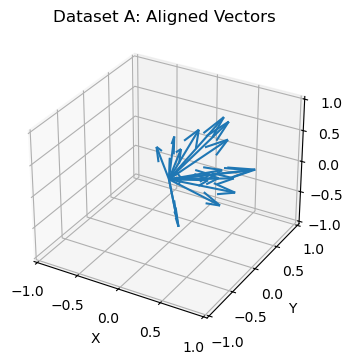

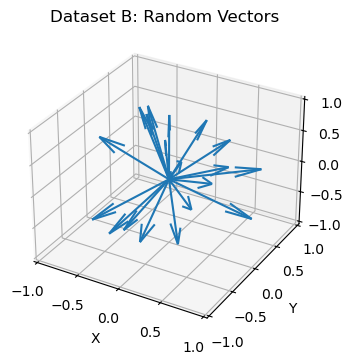

In [4]:
# Visualization function
def plot_3d_vectors(vectors, title):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d')
    ax.quiver(np.zeros(vectors.shape[0]), np.zeros(vectors.shape[0]), np.zeros(vectors.shape[0]),
              vectors[:, 0], vectors[:, 1], vectors[:, 2], 
              length=1, normalize=True)
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    plt.show()

# Visualize original datasets
plot_3d_vectors(dataset_A, "Dataset A: Aligned Vectors")
plot_3d_vectors(dataset_B, "Dataset B: Random Vectors")


In [5]:
# Post-processing: Averaging
def average_vectors(vectors):
    avg = np.mean(vectors, axis=0)
    return avg / np.linalg.norm(avg)

avg_A = average_vectors(dataset_A)
avg_B = average_vectors(dataset_B)

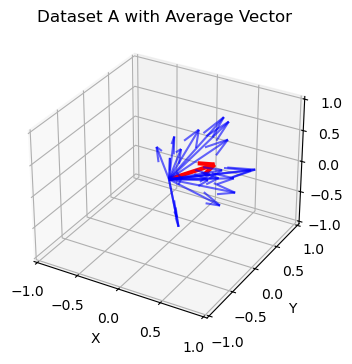

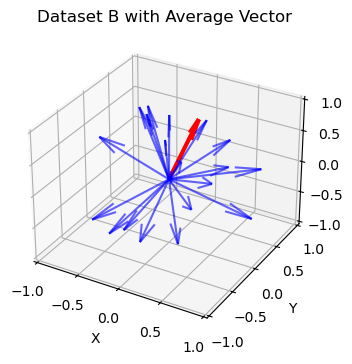

In [6]:
# Visualize with average vectors
def plot_3d_vectors_with_average(vectors, avg, title):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d')
    ax.quiver(np.zeros(vectors.shape[0]), np.zeros(vectors.shape[0]), np.zeros(vectors.shape[0]),
              vectors[:, 0], vectors[:, 1], vectors[:, 2], 
              length=1, normalize=True, color='b', alpha=0.6)
    ax.quiver(0, 0, 0, avg[0], avg[1], avg[2], 
              length=1, normalize=True, color='r', linewidth=3)
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    plt.show()

plot_3d_vectors_with_average(dataset_A, avg_A, "Dataset A with Average Vector")
plot_3d_vectors_with_average(dataset_B, avg_B, "Dataset B with Average Vector")

In [7]:
# Post-processing: PCA
def apply_pca(vectors):
    pca = PCA(n_components=2)
    return pca.fit_transform(vectors), pca.explained_variance_ratio_, pca

pca_A, var_ratio_A, pca_obj_A = apply_pca(dataset_A)
pca_B, var_ratio_B, pca_obj_B = apply_pca(dataset_B)

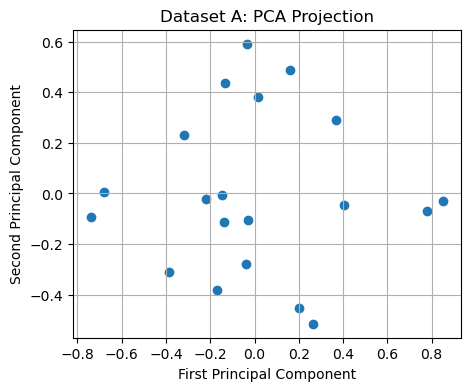

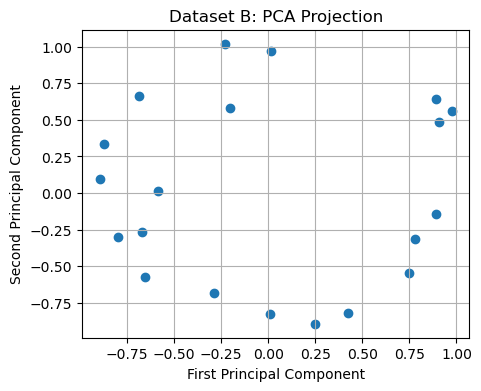

In [8]:
# Visualize PCA results
def plot_2d_pca(pca_vectors, title):
    plt.figure(figsize=figsize)
    plt.scatter(pca_vectors[:, 0], pca_vectors[:, 1])
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title(title)
    plt.grid(True)
    plt.show()

plot_2d_pca(pca_A, "Dataset A: PCA Projection")
plot_2d_pca(pca_B, "Dataset B: PCA Projection")

In [9]:
# Cosine similarity calculations
def cosine_similarity_matrix(vectors):
    normalized = vectors / np.linalg.norm(vectors, axis=1)[:, np.newaxis]
    return normalized @ normalized.T

def plot_cosine_similarity(sim_matrix, title):
    plt.figure(figsize=figsize)
    plt.imshow(sim_matrix, cmap='viridis', vmin=-1, vmax=1)
    plt.colorbar()
    plt.title(title)
    plt.show()

# Calculate and plot cosine similarities
sim_A = cosine_similarity_matrix(dataset_A)
sim_B = cosine_similarity_matrix(dataset_B)


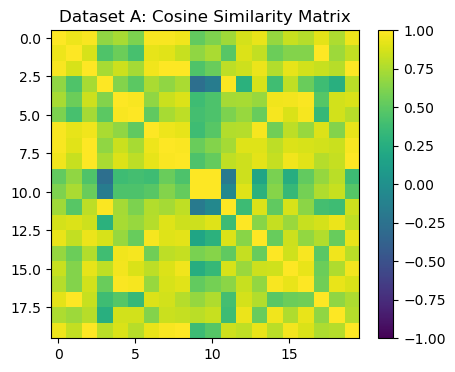

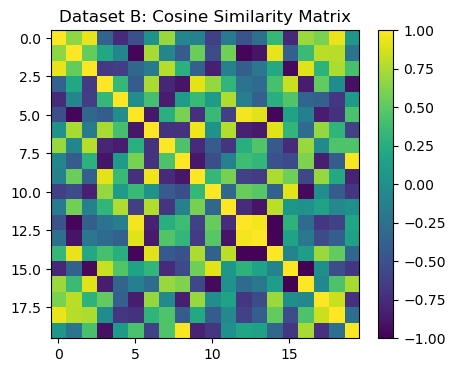

In [10]:
plot_cosine_similarity(sim_A, "Dataset A: Cosine Similarity Matrix")
plot_cosine_similarity(sim_B, "Dataset B: Cosine Similarity Matrix")


In [11]:
# Print summary
print("Dataset A Summary:")
print(f"Average vector: {avg_A}")
print(f"PCA explained variance ratio: {var_ratio_A}")
print("\nDataset B Summary:")
print(f"Average vector: {avg_B}")
print(f"PCA explained variance ratio: {var_ratio_B}")


Dataset A Summary:
Average vector: [ 0.6868376  -0.27135829  0.67425424]
PCA explained variance ratio: [0.59264835 0.35483568]

Dataset B Summary:
Average vector: [-0.16224095  0.93234345  0.32313087]
PCA explained variance ratio: [0.44992352 0.37602936]


In [12]:
# Calculate cosine similarity with average and PCA vectors
def cosine_similarity_with_processed(original, processed, pca_obj=None):
    if pca_obj is not None:
        # Project original data to 2D if we're comparing with PCA result
        original = pca_obj.transform(original)
    
    normalized_original = original / np.linalg.norm(original, axis=1)[:, np.newaxis]
    normalized_processed = processed / np.linalg.norm(processed, axis=1)[:, np.newaxis]
    return normalized_original @ normalized_processed.T

sim_A_avg = cosine_similarity_with_processed(dataset_A, avg_A.reshape(1, -1))
sim_B_avg = cosine_similarity_with_processed(dataset_B, avg_B.reshape(1, -1))

sim_A_pca = cosine_similarity_with_processed(dataset_A, pca_A, pca_obj_A)
sim_B_pca = cosine_similarity_with_processed(dataset_B, pca_B, pca_obj_B)

In [13]:
print("\nCosine Similarity with Average Vector:")
print("Dataset A:", sim_A_avg.flatten())
print("Dataset B:", sim_B_avg.flatten())

print("\nCosine Similarity with PCA Projections:")
print("Dataset A:")
print(sim_A_pca)
print("Dataset B:")
print(sim_B_pca)


Cosine Similarity with Average Vector:
Dataset A: [0.95978142 0.86738313 0.98514817 0.6432588  0.89101433 0.80489651
 0.90815956 0.99421635 0.99045175 0.55782632 0.641748   0.71885274
 0.91010361 0.86958964 0.85723949 0.92147741 0.92358429 0.81670142
 0.88264064 0.97782829]
Dataset B: [ 0.7010524   0.99536405  0.54999382  0.20253989 -0.16930598 -0.9686235
  0.71747127 -0.03093403 -0.47228547  0.5503107  -0.50661064  0.49899967
 -0.94809686 -0.83917509  0.90322985 -0.37741552  0.34755048  0.83798816
  0.83262136 -0.28273631]

Cosine Similarity with PCA Projections:
Dataset A:
[[ 1.          0.8473285   0.73841617  0.26486131 -0.90414179 -0.97919279
   0.96190927  0.98981873  0.1774926  -0.11075591 -0.05491242  0.13767461
  -0.03269861  0.73216012 -0.98591481 -0.46354569 -0.9949778   0.81687501
  -0.72471833  0.24023838]
 [ 0.8473285   1.          0.26755712 -0.28767826 -0.9929951  -0.93746899
   0.66987537  0.76311258 -0.37224234  0.43395514  0.48373897 -0.4093564
   0.50307867  0.2586

In [ ]:
# sample two gaussian distributions 